### importing necessary libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

For this project we'll be using data provided by the National Institute of Statistics in Bolivia (INE) regarding 
data from the past 5 years (periods 2020 - 2024). Its possible to download this data from their official website at http://web2.ine.gob.bo:8081/IneComex/BasesComex.aspx as .txt individual files for each year. 

In [2]:
# First we'll check if there are inconsistencies with the format of the columns, 
# that way we can proceed to concatenate this five files into just one. 

# In both cases the sep = '|' and due to a 'str' problem we have to specify encoding='latin1'


df1 = pd.read_csv ('importaciones.txt', sep = '|', encoding='latin1')     # for the 2024 file 
df2= pd.read_csv ('imp2020.txt', sep = '|', encoding='latin1')            #for the 2020 file 

C:\Users\sebas\AppData\Local\Temp\ipykernel_12776\4217235276.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv ('importaciones.txt', sep = '|', encoding='latin1')     # for the 2024 file


In [2]:
pd.set_option('display.max_columns', None)
# df1.head()

In [4]:
df2.head()

,GESTION,MES,des_aduana,Departamento,des_via,des_medio,des_pais,NANDINA,des_nandina,GCER3,CUODE,Peso_Bruto_kg,Valor_CIF_Sus,Valor_FOB_Sus,Valor_CIF_Bs,Gravamen_Aduanero_Bs,CIIUR3,CUCIR3
0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2,308,297,2145,107,2926,7243
1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,840,199,5963,5803,41503,4151,2919,7439
2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716,4526,4260,31500,0,2520,8484
3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,840,501,346,300,2408,120,2922,7373
4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,140,1166,1961,1675,13647,1366,2424,5532


In [5]:
a = df1.columns.values.tolist()
b = df2.columns.values.tolist()

print (a)
print (b)

['gestion', 'mes', 'aduana', 'desadu', 'depto', 'via', 'desvia', 'medio', 'desmed', 'pais', 'deszon', 'otros', 'otros_tcp', 'despai', 'nandina', 'desnan', 'gcer3', 'cuode', 'kilos', 'kilnet', 'fro', 'fob', 'pto', 'adu', 'pag', 'lib', 'ciiur3', 'cuci', 'cucir3', 'cod_cuo']
['GESTION', 'MES', 'des_aduana', 'Departamento', 'des_via', 'des_medio', 'des_pais', 'NANDINA', 'des_nandina', 'GCER3', 'CUODE', 'Peso_Bruto_kg', 'Valor_CIF_Sus', 'Valor_FOB_Sus', 'Valor_CIF_Bs', 'Gravamen_Aduanero_Bs', 'CIIUR3', 'CUCIR3']


As we can see, there is a difference in the column names between the oldest and the newest files. If we proceed with this and concatenate all the files, it will result in more unnecessary columns, so we need to standardize the column labels.

In [6]:
# first lets make a function to standarize column names
def standarize_columns (df):
    df.columns = df.columns.str.strip().str.lower()      # to get rid of spaces and make it lowercase
    return df

# this will help with labels as 'GESTION' and 'gestion' to be the same 

In [7]:
# for columns that showcase the same thing but have different labels we'll rename them with column_mapping

column_mapping = {
    'des_aduana': 'desadu',
    'departamento': 'depto',
    'des_via': 'desvia',
    'des_medio': 'desmed',
    'des_pais': 'despai',
    'des_nandina': 'desnan',
    'GCER3': 'gcer3',
    'CIIUR3': 'ciiur3',
    'CUCIR3': 'cucir3',
    'peso_bruto_kg': 'kilos',
    'valor_cif_sus': 'fro',
    'valor_fob_sus': 'fob',
    'valor_cif_bs': 'adu'
}

In [8]:
# Now we can proceed to concatinate the files we have saved in a directory

directory = 'c:/Users/sebas/Desktop/practice' 
files = [f for f in os.listdir(directory) if f.endswith ('.txt')]

dfs = []

for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, sep="|", encoding="latin1")
    df = standarize_columns(df)
    df.rename(columns = column_mapping, inplace = True)
    dfs.append(df)

    

C:\Users\sebas\AppData\Local\Temp\ipykernel_12776\743666259.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="|", encoding="latin1")


In [9]:
all_files = pd.concat(dfs, ignore_index = True)

In [10]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027458 entries, 0 to 2027457
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   gestion               float64
 1   mes                   int64  
 2   desadu                object 
 3   depto                 int64  
 4   desvia                object 
 5   desmed                object 
 6   despai                object 
 7   nandina               object 
 8   desnan                object 
 9   gcer3                 object 
 10  cuode                 object 
 11  kilos                 float64
 12  fro                   float64
 13  fob                   float64
 14  adu                   float64
 15  gravamen_aduanero_bs  float64
 16  ciiur3                object 
 17  cucir3                object 
 18  aduana                float64
 19  via                   float64
 20  medio                 float64
 21  pais                  float64
 22  deszon                object 
 23  otros  

In [11]:
all_files.to_csv("c:/Users/sebas/Desktop/practice/merged_raw.csv")

In [3]:
df = pd.read_csv ('merged_raw.csv', index_col=[0])

C:\Users\sebas\AppData\Local\Temp\ipykernel_2060\3692825923.py:1: DtypeWarning: Columns (8,23,24,25,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('merged_raw.csv', index_col=[0])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027458 entries, 0 to 2027457
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   gestion               float64
 2   mes                   int64  
 3   desadu                object 
 4   depto                 int64  
 5   desvia                object 
 6   desmed                object 
 7   despai                object 
 8   nandina               object 
 9   desnan                object 
 10  gcer3                 object 
 11  cuode                 object 
 12  kilos                 float64
 13  fro                   float64
 14  fob                   float64
 15  adu                   float64
 16  gravamen_aduanero_bs  float64
 17  ciiur3                object 
 18  cucir3                object 
 19  aduana                float64
 20  via                   float64
 21  medio                 float64
 22  pais                  float64
 23  deszon 

In [3]:
df.head()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,...,pais,deszon,otros,otros_tcp,kilnet,pto,pag,lib,cuci,cod_cuo
0,2020.0,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Let's drop columns that contain at least half of their values as na.
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027458 entries, 0 to 2027457
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   gestion               float64
 1   mes                   int64  
 2   desadu                object 
 3   depto                 int64  
 4   desvia                object 
 5   desmed                object 
 6   despai                object 
 7   nandina               object 
 8   desnan                object 
 9   gcer3                 object 
 10  cuode                 object 
 11  kilos                 float64
 12  fro                   float64
 13  fob                   float64
 14  adu                   float64
 15  gravamen_aduanero_bs  float64
 16  ciiur3                object 
 17  cucir3                object 
dtypes: float64(6), int64(2), object(10)
memory usage: 293.9+ MB


In [5]:
#to convert "gestion", and "month" to a datetime type, first we get rid on na values
df.dropna(axis = 0, subset = 'gestion', inplace= True)
df["gestion"] = df["gestion"].astype(int)
df["dia"] = 1 #creating a temp day column
# Create 'fecha' by concatenating 'gestion', 'mes', and 'dia'
df["fecha"] = df["gestion"].astype(str) + "-" + df["mes"].astype(str) + "-" + df["dia"].astype(str)
df["fecha"] = pd.to_datetime(df["fecha"])
df = df.drop('dia', axis = 1)

In [6]:
# Now we can optimize memory usage by changing the dtype for some of the remaining columns 
df['mes'] = df['mes'].astype('int8')
df['depto'] = df['depto'].astype('category')
df['desvia'] = df['desvia'].astype('category')
df['desmed'] = df['desmed'].astype('category')
df['despai'] = df['despai'].astype('category')
df['ciiur3'] = df['ciiur3'].astype('category')
df['cucir3'] = df['cucir3'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027426 entries, 0 to 2027457
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   gestion               int32         
 1   mes                   int8          
 2   desadu                object        
 3   depto                 category      
 4   desvia                category      
 5   desmed                category      
 6   despai                category      
 7   nandina               object        
 8   desnan                object        
 9   gcer3                 object        
 10  cuode                 object        
 11  kilos                 float64       
 12  fro                   float64       
 13  fob                   float64       
 14  adu                   float64       
 15  gravamen_aduanero_bs  float64       
 16  ciiur3                category      
 17  cucir3                category      
 18  fecha                 datetime64[ns]
dtypes: ca

In [12]:
ndesnan = df.desnan.unique().tolist()
k = len(ndesnan)
print (k)

7482


In [13]:
nnandina = df.nandina.unique().tolist()
l = len(nnandina)
print (l)

11698


In [6]:
df['nandina'] = df['nandina'].astype('str')

# Exploratory Data Analysis
Now we can start with the exploratory analysis, Let's first look at which countries Bolivia imports the most from.

In [7]:
# this will filter and provide a series with the top 10 countries with the highest ammount of unique imports
# for the past 5 years
df.despai.value_counts().head(10)

despai
CHINA             636064
ESTADOS UNIDOS    213319
BRASIL            175742
JAPON              84708
ALEMANIA           84029
MEXICO             56811
ITALIA             55278
ARGENTINA          55116
INDIA              51774
PERU               47089
Name: count, dtype: int64

In [24]:
# Let's save the index so we can see the values of weight and Fob from this countries.
top_10_unique_imports = df.despai.value_counts().head(10).index

# Now we group them by country and get the total fob values

filtered_country = df[df["despai"].isin(top_10_unique_imports)].copy()
filtered_country['despai'] = filtered_country['despai'].astype(str)
income_by_country = filtered_country.groupby('despai')['fob'].sum()

# do the same for weight

weight_by_country = filtered_country.groupby('despai')['kilos'].sum()

# next lets get the fob values in millions and weight in tons.

income_by_country = income_by_country/1000000
weight_by_country = weight_by_country/1000


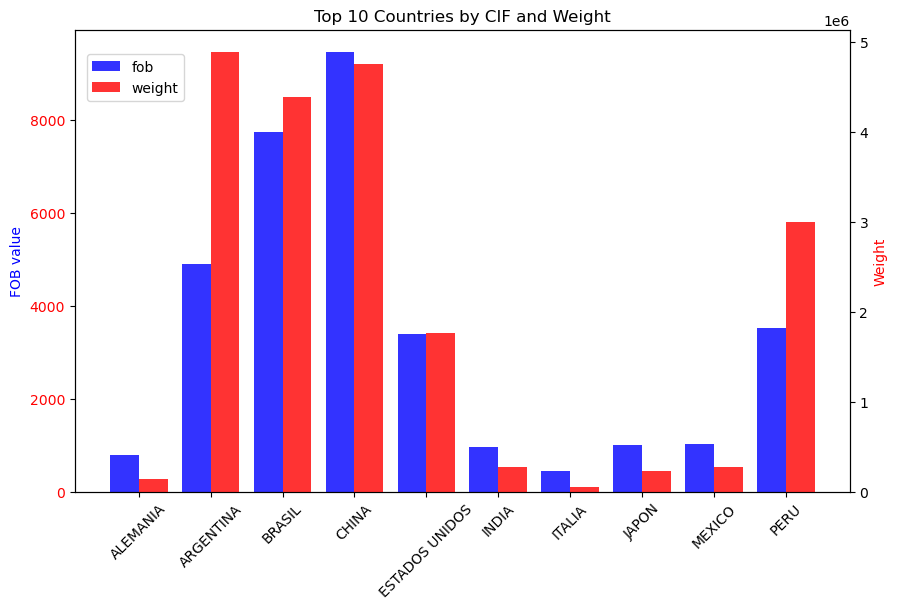

In [42]:
# ploting the results
# let's define the variables
countries = income_by_country.index
fob_values = income_by_country.values
weight_values = weight_by_country.values

# Now we create the figure
fig, ax1 = plt.subplots(figsize =(10, 6))

x = np.arange(len(top_10_unique_imports))

# for the fob values
ax1.bar(x-0.2, fob_values, width=0.4, label= 'fob', color='b', alpha=0.8)
ax1.set_ylabel('FOB value', color ='b')
ax1.tick_params(axis='y', labelcolor='b')

# to showcase both weight and fob on the same graph lets create a twin axes
ax2 = ax1.twinx()
# do the same for weight
ax2.bar(x+0.2, weight_values, width=0.4, label= 'weight', color='r', alpha=0.8)
ax2.set_ylabel('Weight', color ='r')
ax1.tick_params(axis='y', labelcolor='r')

# so the labels on the x axis are readable lets give them an angle
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45)

# Legends
fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.85))

# Naming the plot
plt.title('Top 10 Countries by CIF and Weight')

plt.show()


This graph shows 

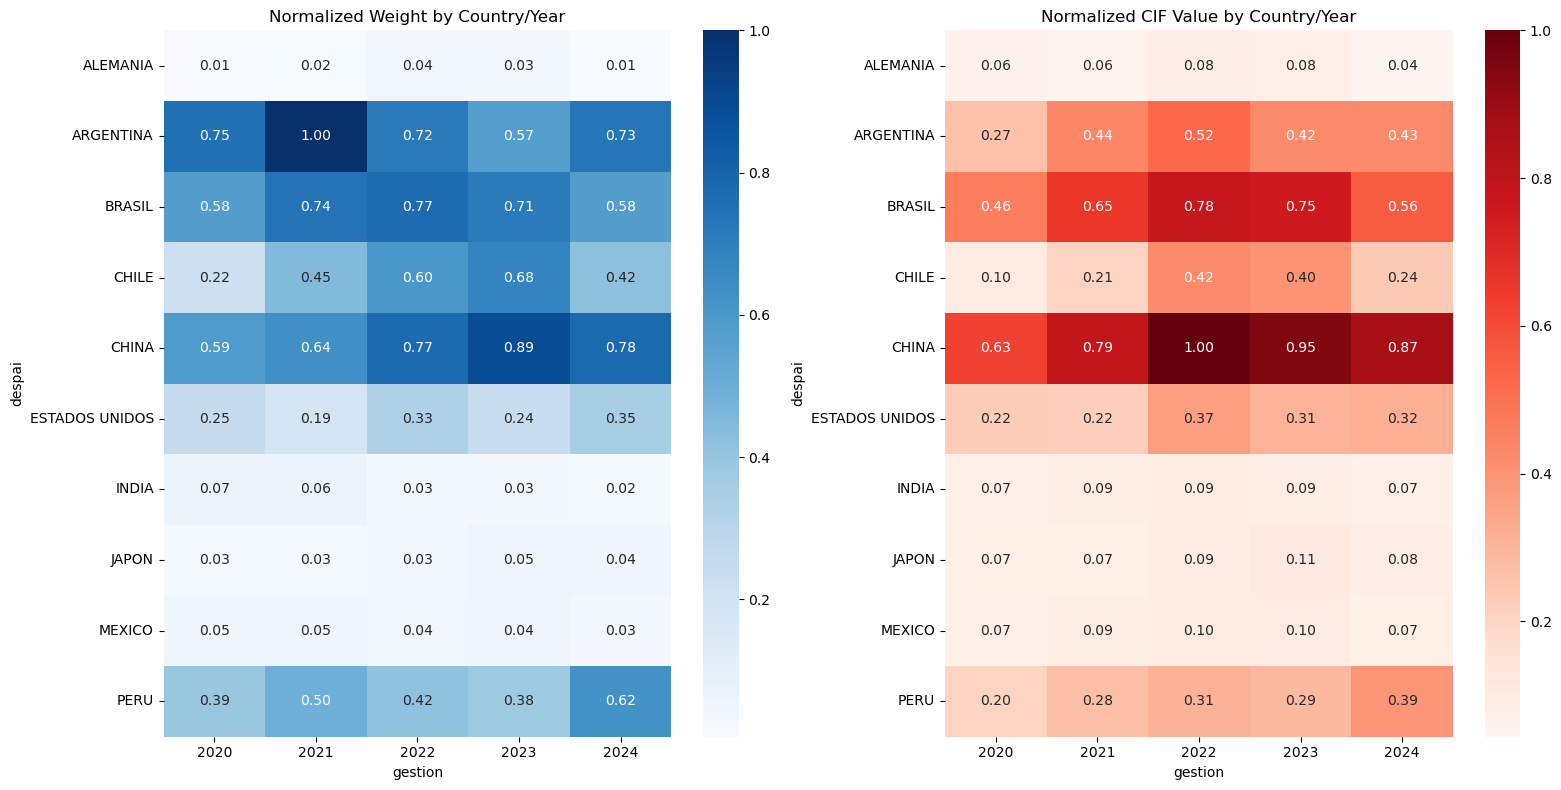

In [43]:
# Pivot table for heatmap (top 10 countries)
heatmap_data = df.groupby(['despai', 'gestion']).agg({'kilos': 'sum', 'fro': 'sum'}).reset_index()
top_countries = heatmap_data.groupby('despai')['fro'].sum().nlargest(10).index
heatmap_data = heatmap_data[heatmap_data['despai'].isin(top_countries)]

# Normalize weight/cif for comparison
heatmap_data['weight_norm'] = heatmap_data['kilos'] / heatmap_data['kilos'].max()
heatmap_data['cif_norm'] = heatmap_data['fro'] / heatmap_data['fro'].max()

# Pivot and plot
pivot_weight = heatmap_data.pivot(index='despai', columns='gestion', values='weight_norm')
pivot_cif = heatmap_data.pivot(index='despai', columns='gestion', values='cif_norm')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(pivot_weight, cmap='Blues', ax=axes[0], annot=True, fmt=".2f")
sns.heatmap(pivot_cif, cmap='Reds', ax=axes[1], annot=True, fmt=".2f")
axes[0].set_title('Normalized Weight by Country/Year')
axes[1].set_title('Normalized CIF Value by Country/Year')
plt.tight_layout()
plt.show()

In [45]:
heatmap_data.head(10)

,despai,gestion,kilos,fro,weight_norm,cif_norm
15,ALEMANIA,2020,1.677384e+07,1.560243e+08,0.012947,0.061294
16,ALEMANIA,2021,2.284272e+07,1.491992e+08,0.017631,0.058612
17,ALEMANIA,2022,5.199990e+07,2.143115e+08,0.040135,0.084191
18,ALEMANIA,2023,4.203437e+07,2.013991e+08,0.032443,0.079119
19,ALEMANIA,2024,8.806281e+06,1.117071e+08,0.006797,0.043884
60,ARGENTINA,2020,9.699689e+08,6.763714e+08,0.748653,0.265710
61,ARGENTINA,2021,1.295618e+09,1.118133e+09,1.000000,0.439255
62,ARGENTINA,2022,9.310137e+08,1.335287e+09,0.718587,0.524562
63,ARGENTINA,2023,7.447335e+08,1.079315e+09,0.574809,0.424005
64,ARGENTINA,2024,9.507603e+08,1.091884e+09,0.733828,0.428943


lets dig into price changes for top categories ('ciiur3') in this past 5 years, in our Dataframe we don't have unit prices, but we can infer this value by dividing the weight values with the CIF values. 
at a first thought we could apply a vectorized operation by creating a new column: 
df["price"] = df["kilos"]/df["fro"] but this would bring a few problems with the outliers.

In [48]:
# Like this we will group up data by month, reducing the impact of the mentioned outlier values
price_trends = df.groupby(['ciiur3', df['fecha'].dt.to_period('M')])['fob'].sum() / df.groupby(['ciiur3', df['fecha'].dt.to_period('M')])['kilos'].sum()  

# the  previous step will set 'ciiur3' and 'fecha' as the index so lets reset it 
price_trends = price_trends.reset_index(name="unit_price") 

price_trends['price_change'] = price_trends.groupby('ciiur3')['unit_price'].pct_change() * 100

In [49]:
price_trends

,ciiur3,fecha,unit_price,price_change
0,0111,2020-01,0.369139,NaN
1,0111,2020-02,0.518511,40.464914
2,0111,2020-03,0.663586,27.979156
3,0111,2020-04,0.333465,-49.748038
4,0111,2020-05,0.247151,-25.883857
...,...,...,...,...
8695,XXXX,2024-08,6.405761,234.469614
8696,XXXX,2024-09,1.981863,-69.061238
8697,XXXX,2024-10,1.852087,-6.548197
8698,XXXX,2024-11,2.399443,29.553491


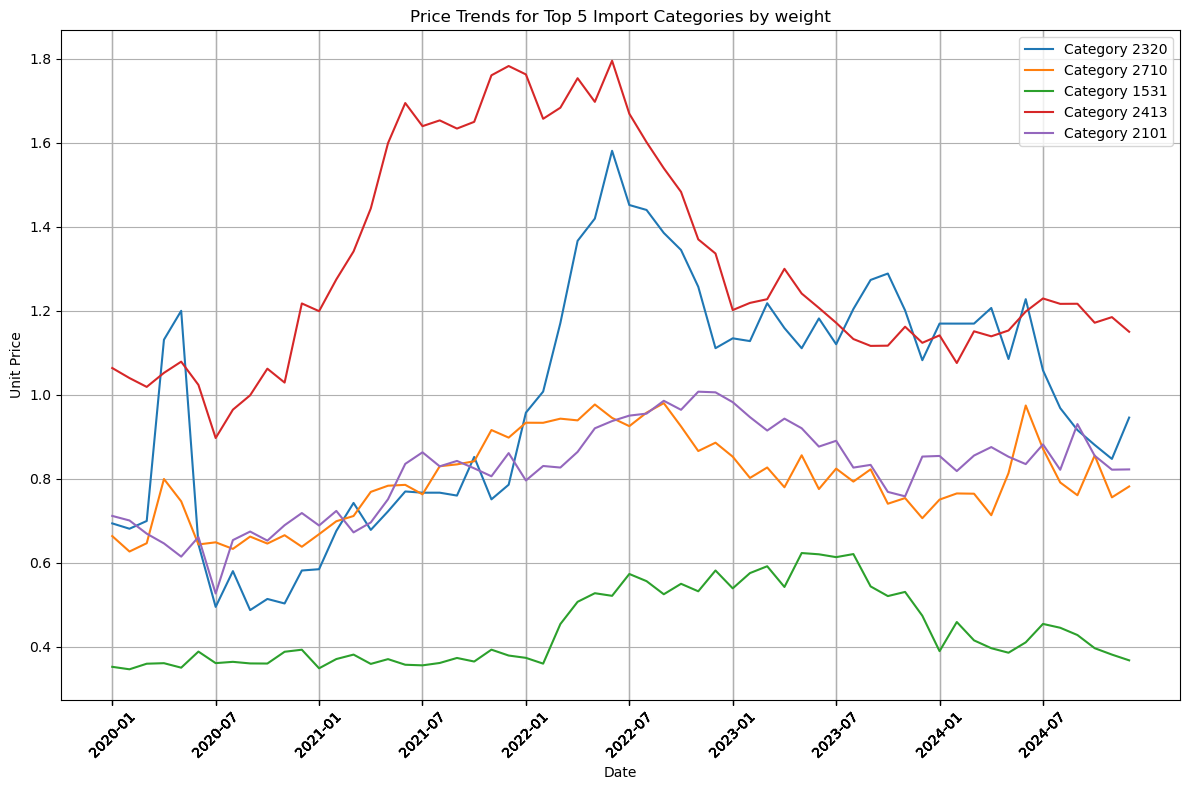

In [51]:
# Select top 5 most imported categories by weight.
top_categories = df.groupby("ciiur3")["kilos"].sum().nlargest(5).index  

# Filter for top categories
filtered_trends = price_trends[price_trends["ciiur3"].isin(top_categories)].copy()

filtered_trends['fecha'] = filtered_trends['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories:
    category_data = filtered_trends[filtered_trends['ciiur3'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Categories by weight')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends['fecha'][::6]) #to get a tick every 6 months
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

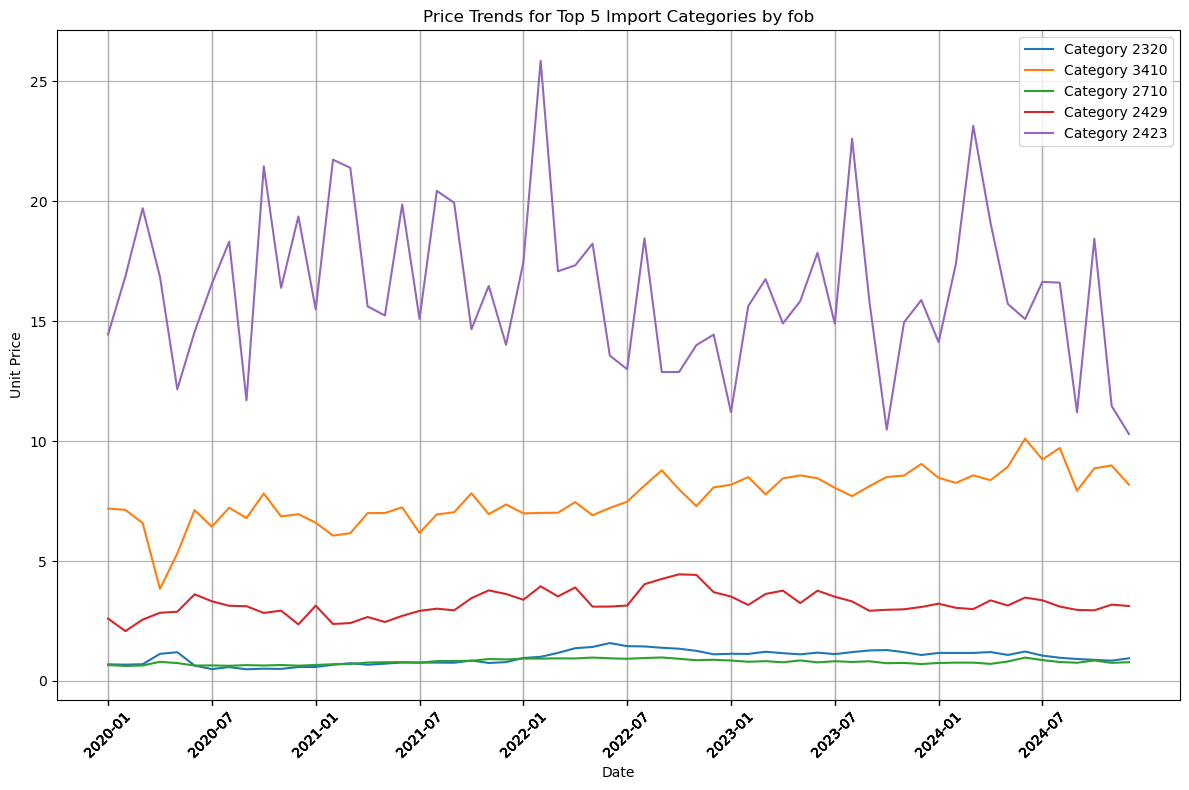

In [53]:
# Let's do the same for the CIF ('fro') values this time 
top_categories_1 = df.groupby("ciiur3")["fob"].sum().nlargest(5).index  

# Filter for top categories
filtered_trends_1 = price_trends[price_trends["ciiur3"].isin(top_categories_1)].copy()

filtered_trends_1['fecha'] = filtered_trends_1['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories_1:
    category_data = filtered_trends_1[filtered_trends_1['ciiur3'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Categories by fob')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends_1['fecha'][::6])
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

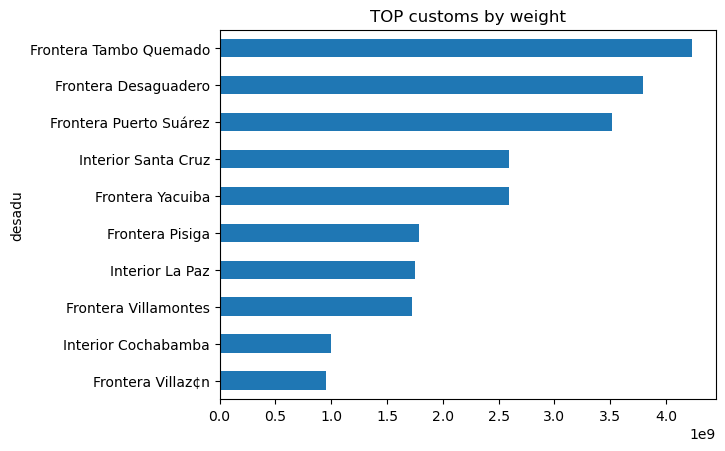

In [12]:
# punto_aduana = df.desadu.unique()
# print (punto_aduana)
df.loc[df['desadu']== 'Frontera Puerto Su\xa0rez', 'desadu'] = 'Frontera Puerto Suárez'

# top customs by weight = 
ax = df.groupby('desadu')['kilos'].sum().nlargest(10).plot(kind='barh', title='TOP customs by weight')
ax.invert_yaxis()
plt.show()

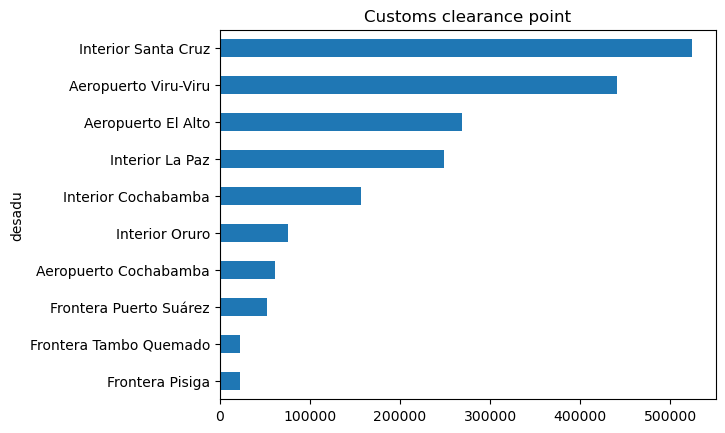

In [30]:
#Top customs by trafic
ax = df.desadu.value_counts().head(10).plot(kind='barh', title='Customs clearance point')
ax.invert_yaxis()
plt.show()

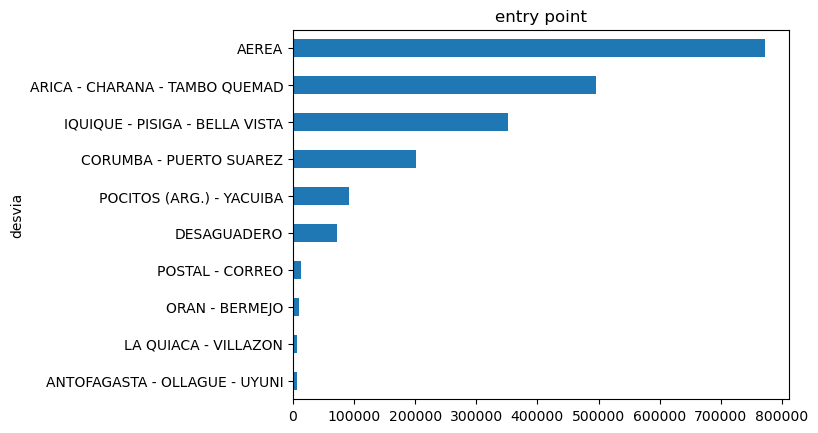

In [11]:
#Top entry points by trafic 
ax = df.desvia.value_counts().head(10).plot(kind='barh', title='entry point')
ax.invert_yaxis()
plt.show()

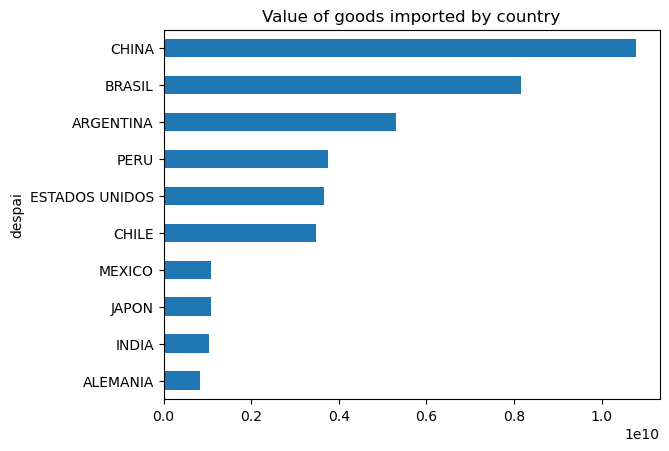

In [10]:
#TOP countries by cif
ax =df.groupby('despai')['fro'].sum().nlargest(10).plot(kind='barh', title='Value of goods imported by country')
ax.invert_yaxis()
plt.show()

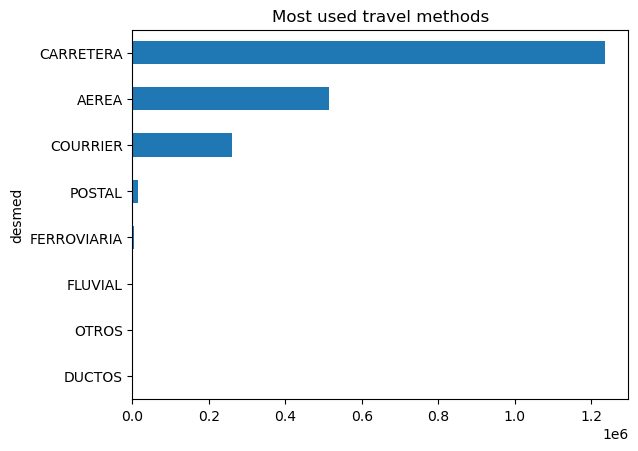

In [23]:
ax = df.desmed.value_counts().plot(kind='barh', title='Most used travel methods')
ax.invert_yaxis()
plt.show()

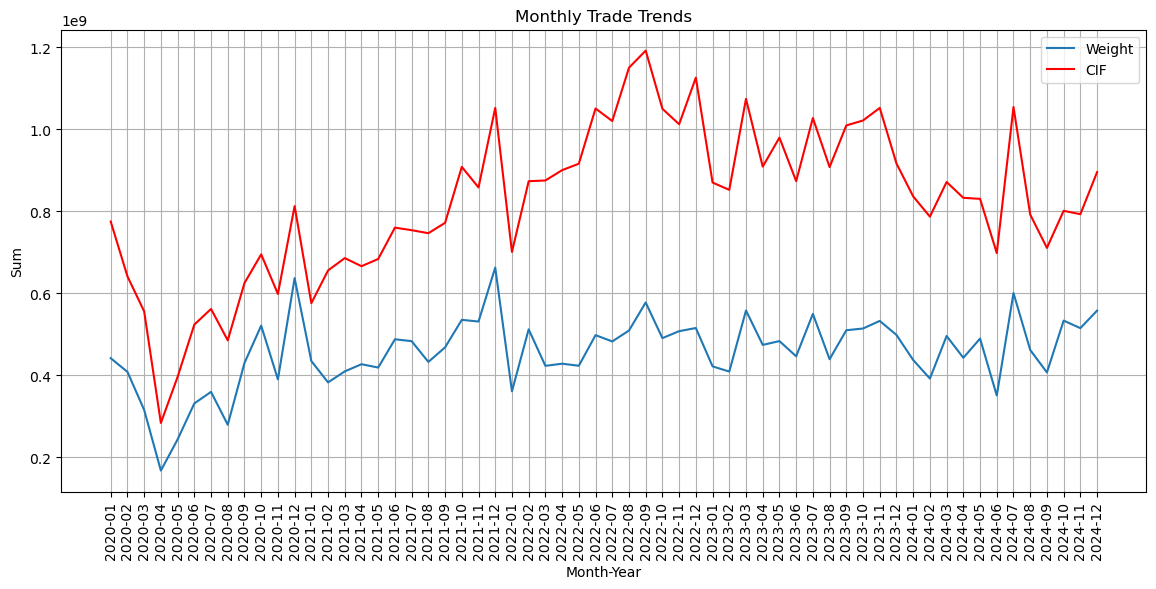

In [24]:
df['month_year'] = df['fecha'].dt.to_period('M')
monthly_trade = df.groupby('month_year').agg({'kilos': 'sum', 'fro': 'sum'}).reset_index()
monthly_trade['month_year'] = monthly_trade['month_year'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trade, x='month_year', y='kilos', label='Weight')
sns.lineplot(data=monthly_trade, x='month_year', y='fro', label='CIF', color='red')
plt.title('Monthly Trade Trends')
plt.xlabel('Month-Year')
plt.ylabel('Sum')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

In [10]:
top_10 = df.ciiur3.value_counts().head(10).index

fil_cat = df[df['ciiur3'].isin(top_10)]

ingresos_adu = fil_cat.groupby('ciiur3')['fob'].sum()

In [66]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print (ingresos_adu)

ciiur3
1810   1,057,184,217.84
2520   8,572,617,259.49
2893   2,195,691,583.98
2899   5,980,962,491.46
2912   4,062,011,746.81
2913   1,645,329,174.14
2919   7,389,174,357.54
3190   1,259,166,529.91
3312   2,105,923,848.52
3430   4,034,697,966.06
Name: adu, dtype: float64


In [11]:
country_10 = df.despai.value_counts().head(10).index
fil_country = df[df["despai"].isin(country_10)]
income_by_country = fil_country.groupby('despai')['adu'].sum()

In [22]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print (income_by_country)

despai
ALEMANIA          5,795.18
ARGENTINA        36,895.06
BRASIL           56,790.38
CHINA            75,015.47
ESTADOS UNIDOS   25,467.46
INDIA             7,283.52
ITALIA            3,276.94
JAPON             7,574.05
MEXICO            7,584.48
PERU             26,092.59
Name: adu, dtype: float64


In [21]:
income_by_country = income_by_country/1000000

In [18]:
weight_imp_by_country = fil_country.groupby('despai')['kilos'].sum()

In [20]:
print (weight_imp_by_country)

despai
ALEMANIA           142,457.11
ARGENTINA        4,892,094.36
BRASIL           4,385,251.29
CHINA            4,750,421.71
ESTADOS UNIDOS   1,761,269.85
INDIA              277,581.86
ITALIA              51,750.99
JAPON              233,555.81
MEXICO             268,649.34
PERU             2,993,012.79
Name: kilos, dtype: float64


In [19]:
weight_imp_by_country = weight_imp_by_country/1000

In [13]:
df['precio'] = df['fob']/df['kilos']

In [12]:
price_trends = df.groupby(['ciiur3', df['fecha'].dt.to_period('M')])['fob'].sum() / df.groupby(['ciiur3', df['fecha'].dt.to_period('M')])['kilos'].sum() #de esta manera se combinan los datos por meses, tambien es util para reducir errores por los datos atipicos 

price_trends = price_trends.reset_index(name="unit_price") #para que 'ciiur3' y 'fecha' vuelvan a su lugar y dejen de ser el indice


In [13]:
price_trends_per_country = df.groupby(['despai', df['fecha'].dt.to_period('M')])['fob'].sum() / df.groupby(['despai', df['fecha'].dt.to_period('M')])['kilos'].sum() 

price_trends_per_country = price_trends_per_country.reset_index(name="unit_price")

In [14]:
price_trends['price_change'] = price_trends.groupby('ciiur3')['unit_price'].pct_change() * 100

In [15]:
top_10_var = price_trends[price_trends['ciiur3'].isin(top_10)]
top_10_var.head(10)

,ciiur3,fecha,unit_price,price_change
2266,1810,2020-01,10.579240,NaN
2267,1810,2020-02,11.432623,8.066585
2268,1810,2020-03,10.923992,-4.448951
2269,1810,2020-04,12.074416,10.531170
2270,1810,2020-05,13.524631,12.010648
2271,1810,2020-06,14.369583,6.247498
2272,1810,2020-07,12.346735,-14.077291
2273,1810,2020-08,15.137948,22.606898
2274,1810,2020-09,11.922045,-21.243987
2275,1810,2020-10,21.208740,77.895155


In [37]:
top_10_var[top_10_var['ciiur3'] == '2520']

,ciiur3,fecha,unit_price,price_change
4123,2520,2020-01,2.167600,NaN
4124,2520,2020-02,2.399250,10.686907
4125,2520,2020-03,2.429422,1.257558
4126,2520,2020-04,2.958859,21.792735
4127,2520,2020-05,2.724814,-7.909963
4128,2520,2020-06,3.078329,12.973913
4129,2520,2020-07,2.764022,-10.210334
4130,2520,2020-08,2.717178,-1.694760
4131,2520,2020-09,2.554733,-5.978451
4132,2520,2020-10,2.534645,-0.786308


In [38]:
top_10_var[top_10_var['ciiur3'] == '2899']

,ciiur3,fecha,unit_price,price_change
5023,2899,2020-01,2.054879,NaN
5024,2899,2020-02,2.413099,17.432660
5025,2899,2020-03,2.080072,-13.800809
5026,2899,2020-04,2.444538,17.521816
5027,2899,2020-05,2.226189,-8.932121
5028,2899,2020-06,2.097328,-5.788437
5029,2899,2020-07,2.125763,1.355804
5030,2899,2020-08,1.902582,-10.498901
5031,2899,2020-09,1.892610,-0.524102
5032,2899,2020-10,2.004774,5.926423


In [16]:
price_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   ciiur3        8140 non-null   object   
 1   fecha         8140 non-null   period[M]
 2   unit_price    8139 non-null   float64  
 3   price_change  7995 non-null   float64  
dtypes: float64(2), object(1), period[M](1)
memory usage: 254.5+ KB


In [43]:
df.ciiur3.value_counts().head(10)

ciiur3
3430    160842
2899    104411
2919     97218
2520     89453
2912     85713
1810     80480
2893     64838
2913     62404
3312     61569
3190     57046
Name: count, dtype: int64

In [50]:
df[df['despai']== 'CHILE']

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,...,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha,precio
18,18,2020,11,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHILE,4410110000,TABLEROS DE PARTICULAS DE MADERA,...,522,15854.0,11343.0,10597.0,78946.0,7897.0,2021,6342,2020-11-01,0.668412
290,290,2020,10,Especializada Interior Santa C,7,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHILE,9017209000,"LOS DEMAS INSTRUMENTOS DE DIBUJO,TRAZADO O CAL...",...,810,357.0,1336.0,1296.0,9298.0,1393.0,3312,8742,2020-10-01,3.630252
477,477,2020,10,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHILE,3401300000,PRODUCTOS Y PREPARACIONES ORGANICOS TENSOACTIV...,...,140,645.0,1491.0,1325.0,10375.0,0.0,2424,5542,2020-10-01,2.054264
524,524,2020,3,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHILE,7318159000,"LOS DEMAS TORNILLOS Y PERNOS,INCLUSO CON SUS T...",...,533,3093.0,18208.0,17112.0,126731.0,12673.0,2899,6942,2020-03-01,5.532493
704,704,2020,12,Interior Cochabamba,3,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHILE,4810920000,LOS DEMAS PAPELES Y CARTONES: MULTICAPAS,...,523,8080.0,10029.0,8544.0,69803.0,6981.0,2101,6417,2020-12-01,1.057426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027089,2027089,2024,12,Aeropuerto Viru-Viru,7,AEREA,COURRIER,CHILE,3919100000,"PLACAS,LAMINAS,HOJAS,CINTAS,TIRAS Y DEMAS FORM...",...,552,1.0,23.0,3.0,157.0,NaN,2520,5821,2024-12-01,3.000000
2027090,2027090,2024,12,Aeropuerto Viru-Viru,7,AEREA,COURRIER,CHILE,4901999000,"LOS DEMAS LIBROS, FOLLETOS E IMPRESOS SIMILA...",...,190,1.0,101.0,84.0,705.0,NaN,2211,8921,2024-12-01,84.000000
2027091,2027091,2024,12,Aeropuerto Viru-Viru,7,AEREA,COURRIER,CHILE,4911910000,"LOS DEMAS IMPRESOS: ESTAMPAS,GRABADOS Y FOTOGR...",...,190,2.0,142.0,120.0,988.0,NaN,2219,8928,2024-12-01,60.000000
2027092,2027092,2024,12,Aeropuerto Viru-Viru,7,AEREA,COURRIER,CHILE,4911990090,"LOS DEMAS IMPRESOS, INCLUIDAS LAS ESTAMPAS, GR...",...,190,12.0,53.0,5.0,369.0,NaN,2219,8928,2024-12-01,0.416667


#  ploting the results 

In [20]:
# plot with matplotlib

countries = income_by_country.index
cif_values = income_by_country.values
weight_values = weight_imp_by_country.values

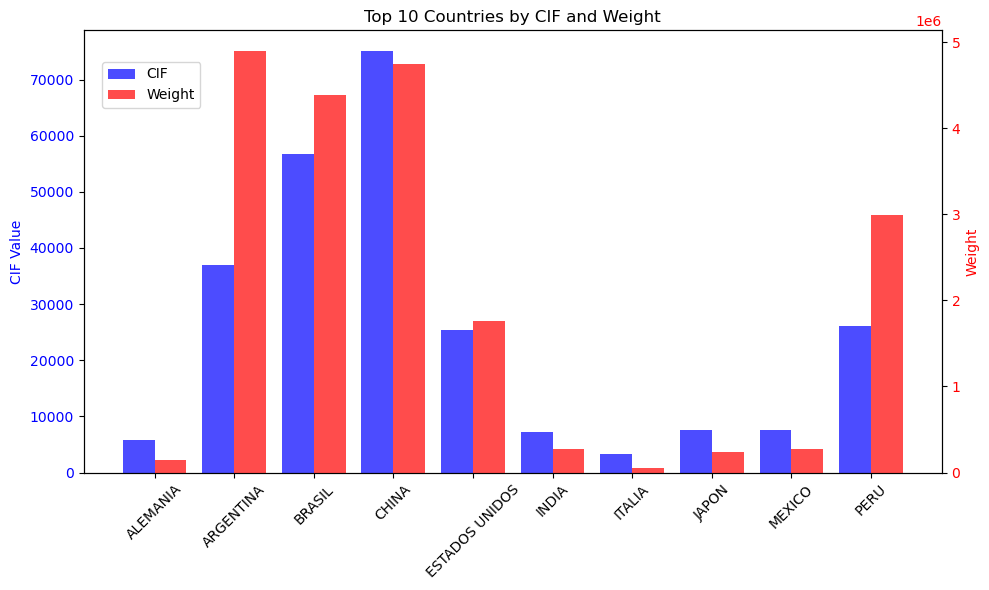

In [25]:
# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar positions
x = np.arange(len(countries))

# Plot CIF values
ax1.bar(x - 0.2, cif_values, width=0.4, label='CIF', color='b', alpha=0.7)
ax1.set_ylabel('CIF Value', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for weight
ax2 = ax1.twinx()
ax2.bar(x + 0.2, weight_values, width=0.4, label='Weight', color='r', alpha=0.7)
ax2.set_ylabel('Weight', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45)

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Title
plt.title('Top 10 Countries by CIF and Weight')

# Show the plot
plt.tight_layout()
plt.show()

using Seaborn

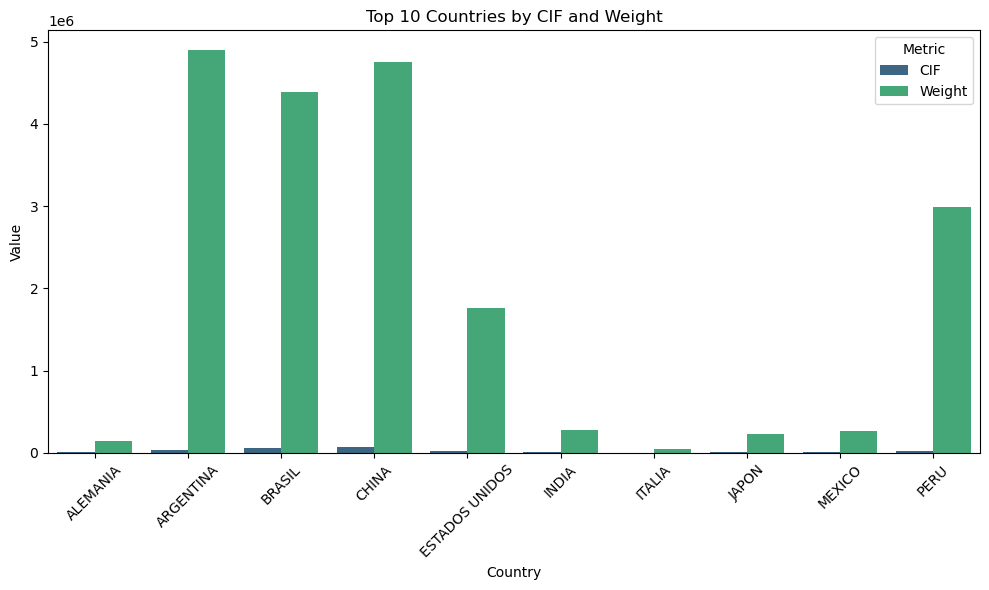

In [26]:
# Combining the data into a DataFrame
data = pd.DataFrame({
    'Country': countries,
    'CIF': cif_values,
    'Weight': weight_values
})

# Melt the DataFrame for seaborn
data_melted = data.melt(id_vars='Country', var_name='Metric', value_name='Value')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Value', hue='Metric', data=data_melted, palette='viridis')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Top 10 Countries by CIF and Weight')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

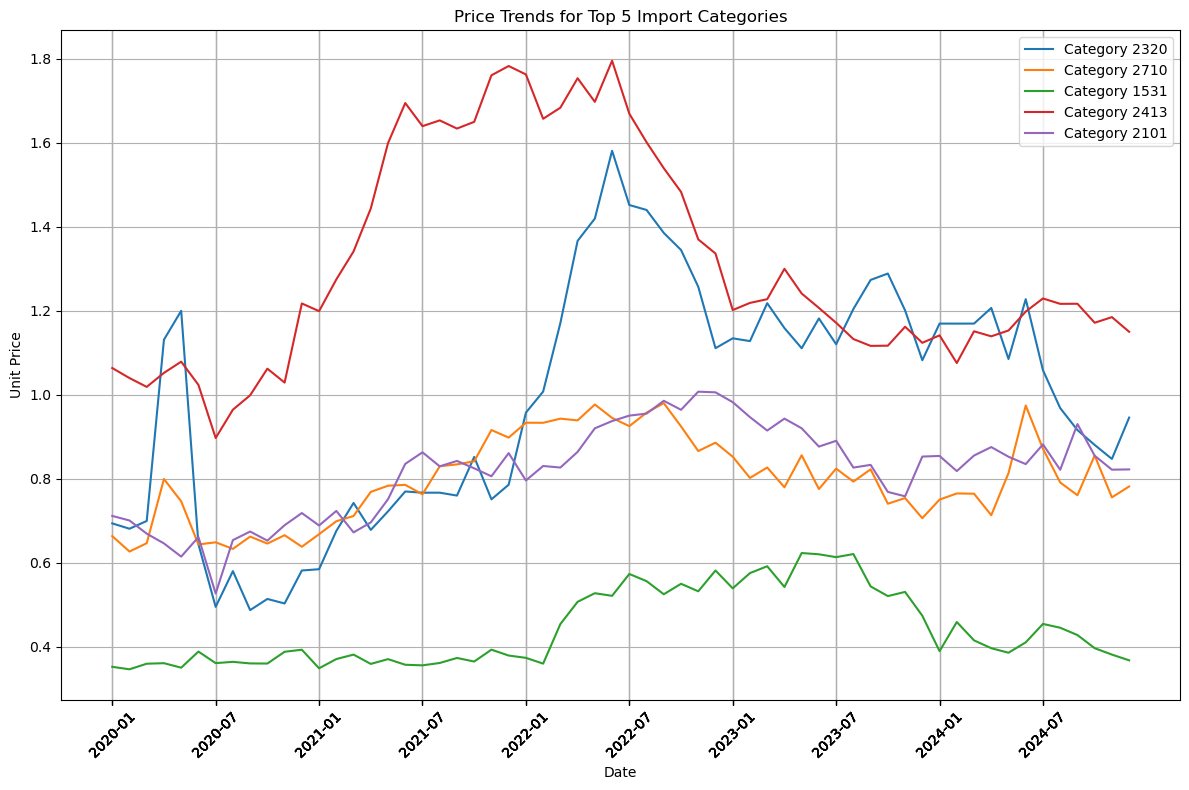

In [21]:
# Select top N most imported categories (by total weight or fob)
top_categories = df.groupby("ciiur3")["kilos"].sum().nlargest(5).index  

# Filter for top categories
filtered_trends = price_trends[price_trends["ciiur3"].isin(top_categories)].copy()

filtered_trends['fecha'] = filtered_trends['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories:
    category_data = filtered_trends[filtered_trends['ciiur3'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Categories')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends['fecha'][::6])
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

In [28]:
price_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   ciiur3        8140 non-null   object   
 1   fecha         8140 non-null   period[M]
 2   unit_price    8139 non-null   float64  
 3   price_change  7995 non-null   float64  
dtypes: float64(2), object(1), period[M](1)
memory usage: 254.5+ KB


C:\Users\sebas\AppData\Local\Temp\ipykernel_8928\1092086796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trends['fecha'] = filtered_trends['fecha'].astype(str)


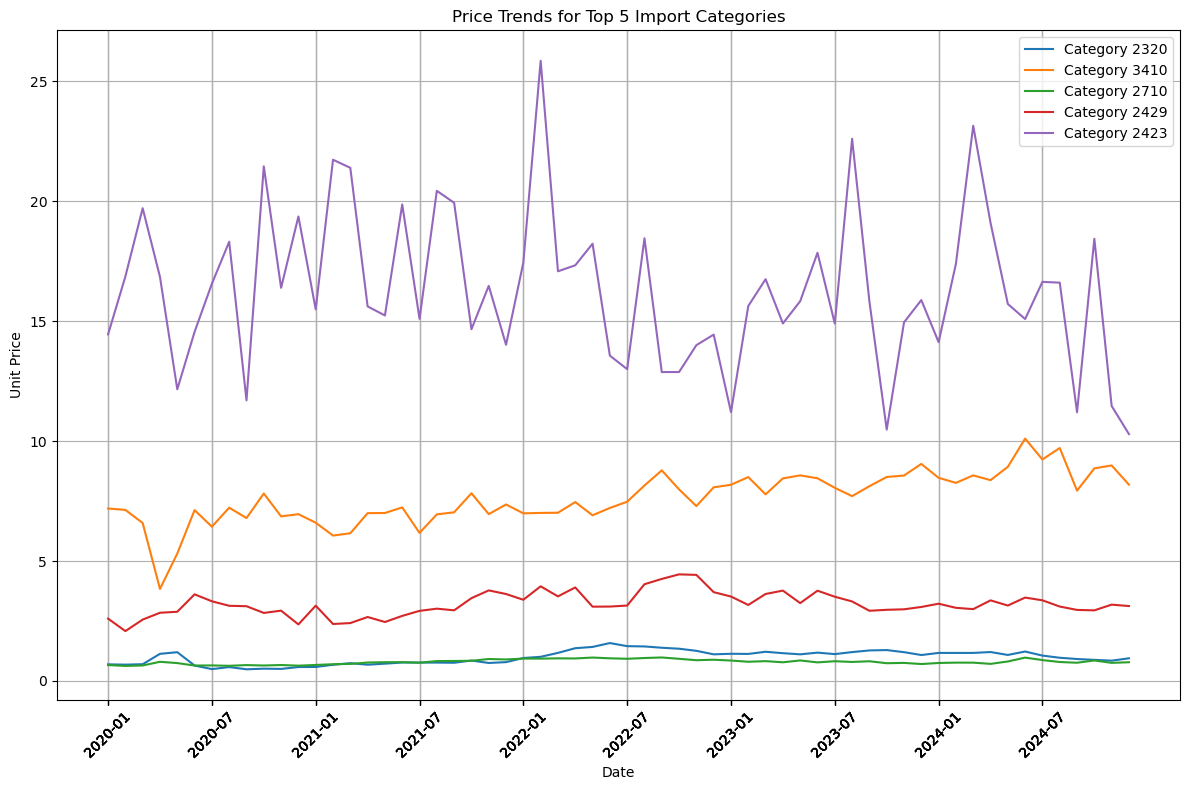

In [44]:
# Select top N most imported categories (by total weight or fob)
top_categories = df.groupby("ciiur3")["fob"].sum().nlargest(5).index  # Change 5 to any number

# Filter for top categories
filtered_trends = price_trends[price_trends["ciiur3"].isin(top_categories)]

filtered_trends['fecha'] = filtered_trends['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories:
    category_data = filtered_trends[filtered_trends['ciiur3'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Categories')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends['fecha'][::6])
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_8928\2556869813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trends_country['fecha'] = filtered_trends_country['fecha'].astype(str)


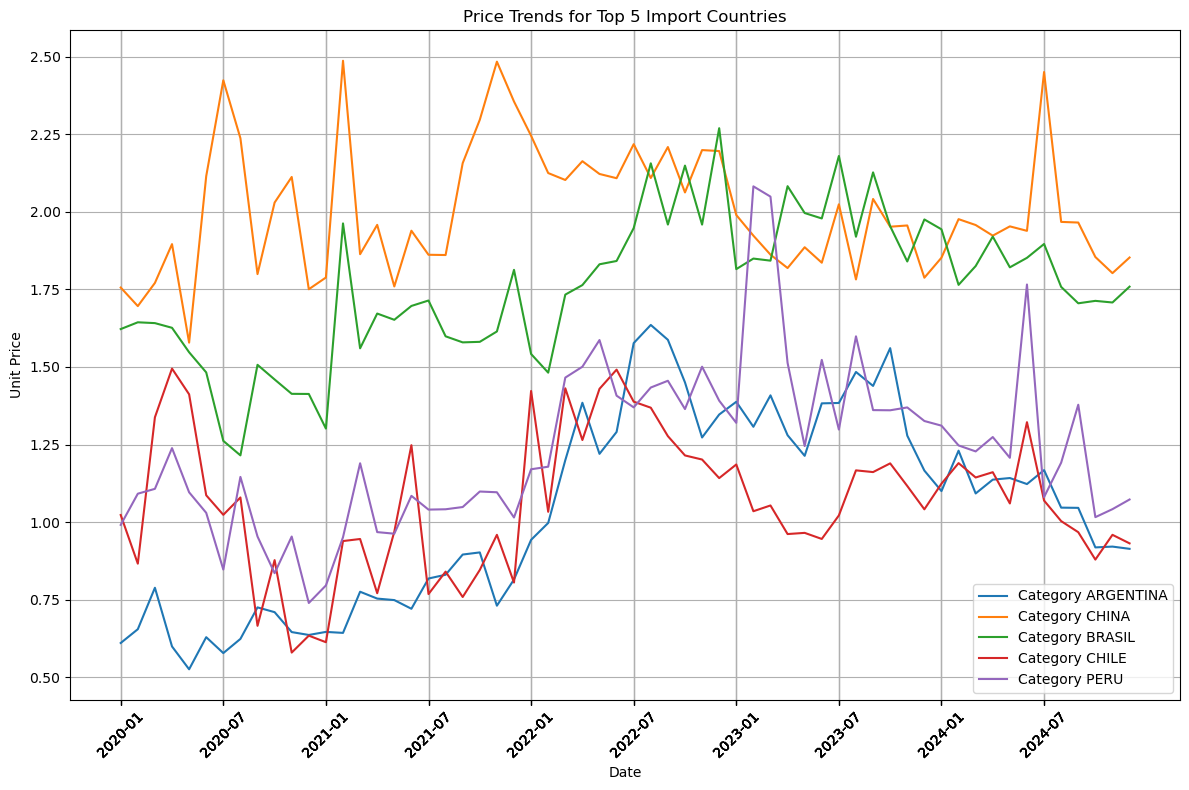

In [49]:
# Select top N most imported categories (by total weight or fob)
top_countries = df.groupby("despai")["kilos"].sum().nlargest(5).index  # Change 5 to any number

# Filter for top categories
filtered_trends_country = price_trends_per_country[price_trends_per_country["despai"].isin(top_categories)]

filtered_trends_country['fecha'] = filtered_trends_country['fecha'].astype(str)
plt.figure(figsize=(12, 8))

for category in top_categories:
    category_data = filtered_trends_country[filtered_trends_country['despai'] == category]
    plt.plot(category_data['fecha'], category_data['unit_price'], label=f'Category {category}')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Price Trends for Top 5 Import Countries')
plt.legend()
plt.grid(True)

plt.xticks(filtered_trends['fecha'][::6])
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027426 entries, 0 to 2027457
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   gestion               int32         
 2   mes                   int64         
 3   desadu                object        
 4   depto                 int64         
 5   desvia                object        
 6   desmed                object        
 7   despai                object        
 8   nandina               object        
 9   desnan                object        
 10  gcer3                 object        
 11  cuode                 object        
 12  kilos                 float64       
 13  fro                   float64       
 14  fob                   float64       
 15  adu                   float64       
 16  gravamen_aduanero_bs  float64       
 17  ciiur3                object        
 18  cucir3                object        
 19  fecha

In [24]:
df.head()

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
0,0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2.0,308.0,297.0,2145.0,107.0,2926,7243,2020-07-01
1,1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DEPURAR LIQUIDOS O GASES,420,840,199.0,5963.0,5803.0,41503.0,4151.0,2919,7439,2020-09-01
2,2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716.0,4526.0,4260.0,31500.0,0.0,2520,8484,2020-11-01
3,3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,"PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQUE PUEDAN CORTAR),ELECTRICOS(INCLUIDOS LOS DE GAS CALENTADO ELECTRICAMENTE),DE LASER U OTROS HACES DE LUZ O DE FOTONES,ULTRASONIDO,HACES DE ELECTRONES",420,840,501.0,346.0,300.0,2408.0,120.0,2922,7373,2020-01-01
4,4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INCLUIDO LOS COMPACTOS",630,140,1166.0,1961.0,1675.0,13647.0,1366.0,2424,5532,2020-02-01


In [16]:
df.gravamen_aduanero_bs.isna().value_counts() 

gravamen_aduanero_bs
False    2027394
True          32
Name: count, dtype: int64

In [15]:
# to fill NaN values in this column
df['gravamen_aduanero_bs']=df['gravamen_aduanero_bs'].fillna(df['adu'] * 0.05) 

In [23]:
pd.set_option('display.max_colwidth', None)
df[df['gravamen_aduanero_bs'].isna()]

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
417738,417738,2021,1,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01
445243,445243,2021,2,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01
487890,487890,2021,3,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-01
513781,513781,2021,4,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-01
561912,561912,2021,5,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
622302,622302,2021,7,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01
670840,670840,2021,9,Interior Cochabamba,3,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,ECUADOR,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01
692481,692481,2021,9,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01
698501,698501,2021,8,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920.0,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-01
816523,816523,2022,2,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3808949920,LOS DEMAS DESINFECTANTES A BASE DE HIPOCLORITO DE SODIO (LAVANDINA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01


In [22]:

df.describe()

,Unnamed: 0,gestion,mes,depto,kilos,fro,fob,adu,gravamen_aduanero_bs,fecha
count,2.027426e+06,2.027426e+06,2.027426e+06,2.027426e+06,2.027394e+06,2.027394e+06,2.027376e+06,2.027394e+06,2.027394e+06,2027426
mean,1.013728e+06,2.022034e+03,6.604081e+00,4.940307e+00,1.354315e+04,2.433802e+04,2.237115e+04,1.693949e+05,7.932209e+03,2022-07-02 08:35:36.079147008
min,0.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.100000e+01,0.000000e+00,0.000000e+00,2020-01-01 00:00:00
25%,5.068592e+05,2.021000e+03,4.000000e+00,2.000000e+00,5.000000e+00,1.390000e+02,1.200000e+02,9.650000e+02,1.900000e+01,2021-05-01 00:00:00
50%,1.013730e+06,2.022000e+03,7.000000e+00,7.000000e+00,4.100000e+01,8.050000e+02,7.250000e+02,5.603000e+03,2.030000e+02,2022-07-01 00:00:00
75%,1.520594e+06,2.023000e+03,1.000000e+01,7.000000e+00,5.900000e+02,5.495000e+03,4.980000e+03,3.824400e+04,1.521000e+03,2023-09-01 00:00:00
max,2.027457e+06,2.024000e+03,1.200000e+01,1.000000e+01,1.028779e+08,1.080468e+08,1.009783e+08,7.520058e+08,4.244155e+07,2024-12-01 00:00:00
std,5.852790e+05,1.373612e+00,3.480123e+00,2.262118e+00,3.422634e+05,3.767598e+05,3.488682e+05,2.622251e+06,1.354523e+05,NaN


# Preguntas 


Which control points or entry points handle the most imports?
What are the most common travel methods used for imports?
Are there seasonal trends in imports (monthly patterns)?
Which countries contribute the most to imports by weight or value?
What are the top import_specific_category_codes by weight or value?
Are there significant differences in import_tax across different categories?
Which states receive the most imports, and through which entry points?
Are certain countries more likely to use specific travel_methods or control_points?

Are there yearly/monthly trends in weight, FOB, or CIF values?
Has the distribution of travel_methods or countries changed over time?

Do certain countries specialize in specific import_fields?
Are there natural groupings in imports based on weight, CIF, and country?
Can we forecast future trade volumes based on historical trends?

In [10]:
df.head()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2.0,308.0,297.0,2145.0,107.0,2926,7243,2020-07-01
1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,840,199.0,5963.0,5803.0,41503.0,4151.0,2919,7439,2020-09-01
2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716.0,4526.0,4260.0,31500.0,0.0,2520,8484,2020-11-01
3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,840,501.0,346.0,300.0,2408.0,120.0,2922,7373,2020-01-01
4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,140,1166.0,1961.0,1675.0,13647.0,1366.0,2424,5532,2020-02-01


In [16]:
df[df['desadu'] == 'Interior Santa Cruz'].head()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
5,2020,5,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,TAILANDIA,4016999000,LAS DEMAS MANUFACTURAS DE CAUCHO VULCANIZADO S...,630,220,9.0,629.0,582.0,4376.0,437.0,2519,6299,2020-05-01
6,2020,5,Interior Santa Cruz,7,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,TURQUIA,8421310000,APARATOS PARA FILTRAR O DEPURAR GASES: FILTROS...,410,840,1.0,27.0,25.0,185.0,9.0,2919,7436,2020-05-01
9,2020,7,Interior Santa Cruz,7,CORUMBA - PUERTO SUAREZ,CARRETERA,BRASIL,8419110000,CALENTADORES DE AGUA DE CALENTAMIENTO INSTANTA...,410,840,43.0,481.0,300.0,3348.0,0.0,2930,7418,2020-07-01
13,2020,1,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,AUSTRALIA,8482100000,RODAMIENTOS DE BOLAS,420,533,25.0,709.0,691.0,4935.0,247.0,2913,7461,2020-01-01
23,2020,8,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,4911990090,"LOS DEMAS IMPRESOS, INCLUIDAS LAS ESTAMPAS, GR...",630,190,1.0,4.0,4.0,29.0,3.0,2219,8928,2020-08-01


In [27]:
# punto_aduana = df.desadu.unique()
# print (punto_aduana)

df.loc[df['desadu']== 'Frontera Puerto Su\xa0rez', 'desadu'] = 'Frontera Puerto Suárez'

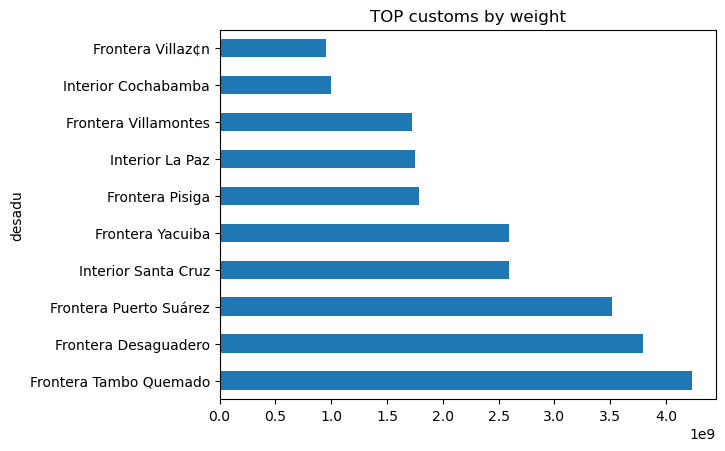

In [42]:
# top customs by weight = 
df.groupby('desadu')['kilos'].sum().nlargest(10).plot(kind='barh', title='TOP customs by weight')
plt.show()

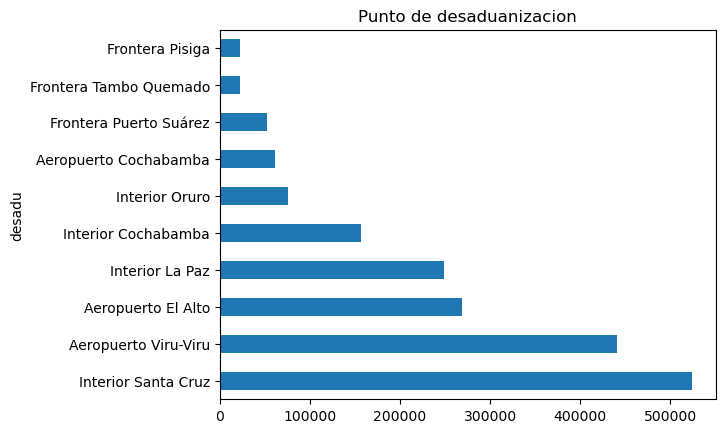

In [33]:
#Top customs by trafic
df.desadu.value_counts().head(10).plot(kind='barh', title='Punto de desaduanizacion')
plt.show()

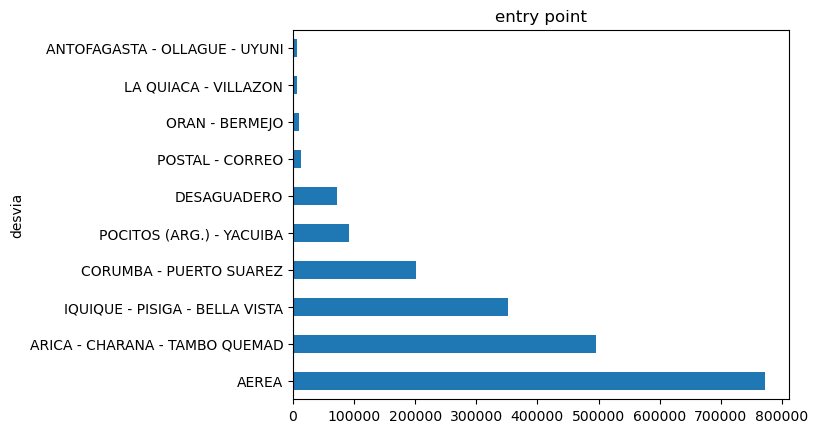

In [32]:
#Top entry points by trafic 
df.desvia.value_counts().head(10).plot(kind='barh', title='entry point')
plt.show()

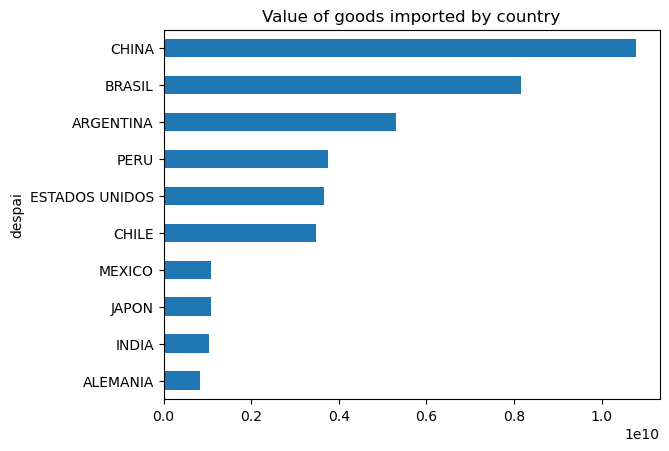

In [39]:
#TOP countries by cif
ax =df.groupby('despai')['fro'].sum().nlargest(10).plot(kind='barh', title='Value of goods imported by country')
ax.invert_yaxis()
plt.show()

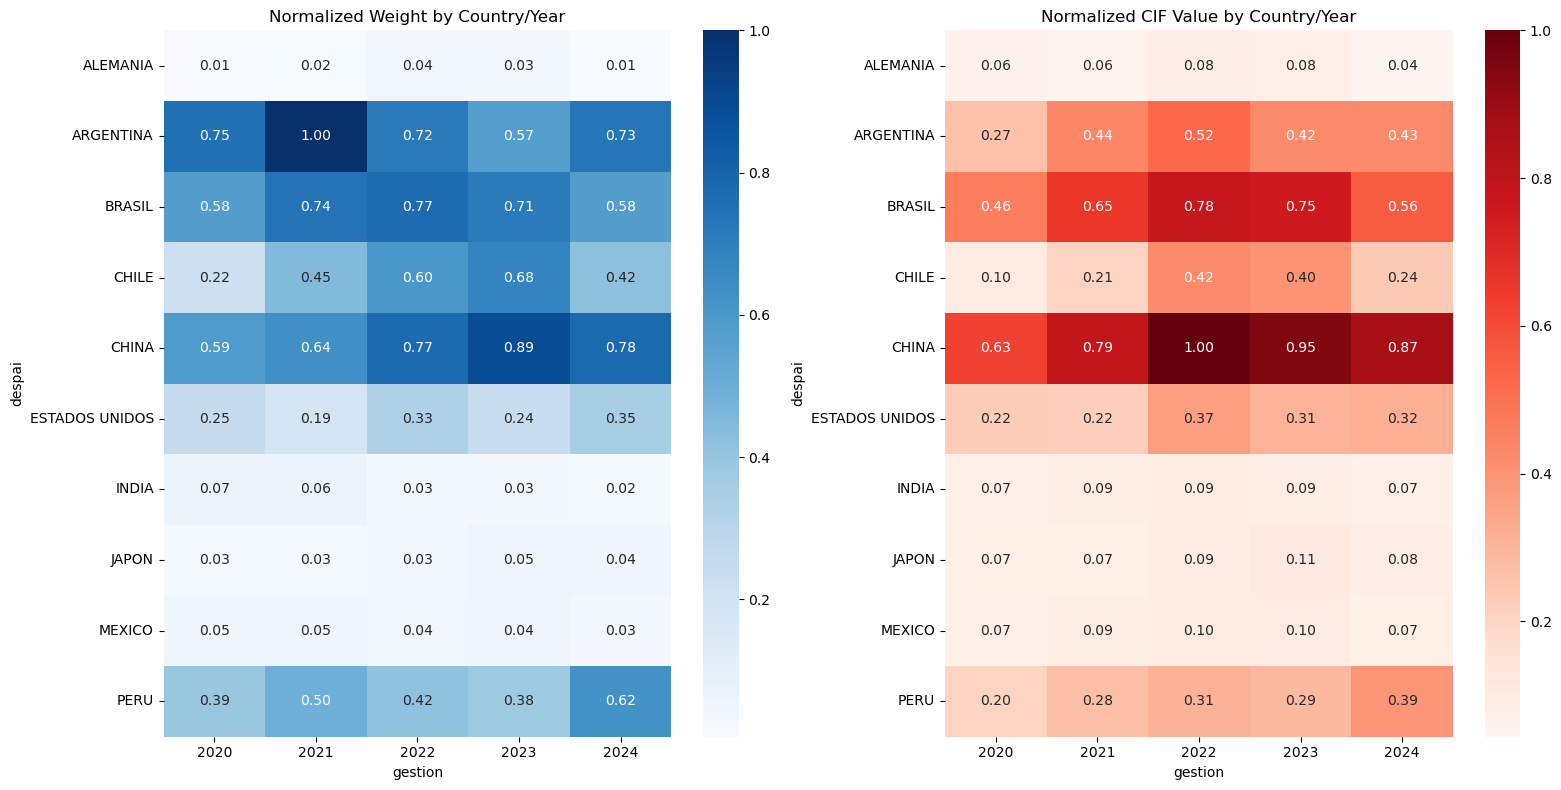

In [45]:
# Pivot table for heatmap (top 10 countries)
heatmap_data = df.groupby(['despai', 'gestion']).agg({'kilos': 'sum', 'fro': 'sum'}).reset_index()
top_countries = heatmap_data.groupby('despai')['fro'].sum().nlargest(10).index
heatmap_data = heatmap_data[heatmap_data['despai'].isin(top_countries)]

# Normalize weight/cif for comparison
heatmap_data['weight_norm'] = heatmap_data['kilos'] / heatmap_data['kilos'].max()
heatmap_data['cif_norm'] = heatmap_data['fro'] / heatmap_data['fro'].max()

# Pivot and plot
pivot_weight = heatmap_data.pivot(index='despai', columns='gestion', values='weight_norm')
pivot_cif = heatmap_data.pivot(index='despai', columns='gestion', values='cif_norm')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(pivot_weight, cmap='Blues', ax=axes[0], annot=True, fmt=".2f")
sns.heatmap(pivot_cif, cmap='Reds', ax=axes[1], annot=True, fmt=".2f")
axes[0].set_title('Normalized Weight by Country/Year')
axes[1].set_title('Normalized CIF Value by Country/Year')
plt.tight_layout()
plt.show()


Import Tax Statistics by depto:
           mean  median        std   count  min          max
depto                                                       
1       4361.78   378.0   14578.68    4551  0.0    346708.00
2       6822.04   209.0   58275.64  447404  0.0   6843794.34
3       6461.03   206.0   39819.85  184811  0.0   3571185.00
4      24813.25  1000.0  263221.29  106656  0.0  35211718.00
5      14872.50   418.0  214617.49   12025  0.0  15157664.00
6      34507.49    32.0  556185.51   33984  0.0  42441554.00
7       5078.19   140.0   91242.41  845908  0.0  29294266.74
8       1390.42     0.0   13970.56    1133  0.0    274904.00
9        718.78    64.0    4557.05    1303  0.0    117607.00
10         0.00     0.0       0.00     151  0.0         0.00

ANOVA Test for depto:
F-statistic: nan
p-value: nan
p < 0.05 indicates statistically significant differences

Import Tax Statistics by desmed:
                   mean  median         std   count  min          max
desmed               

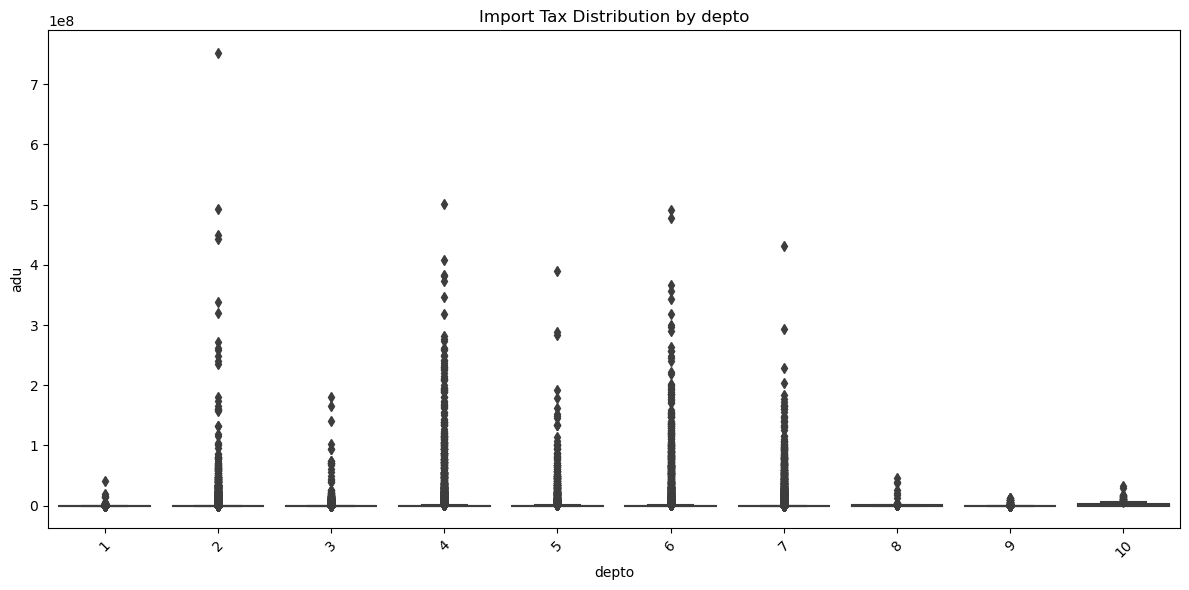

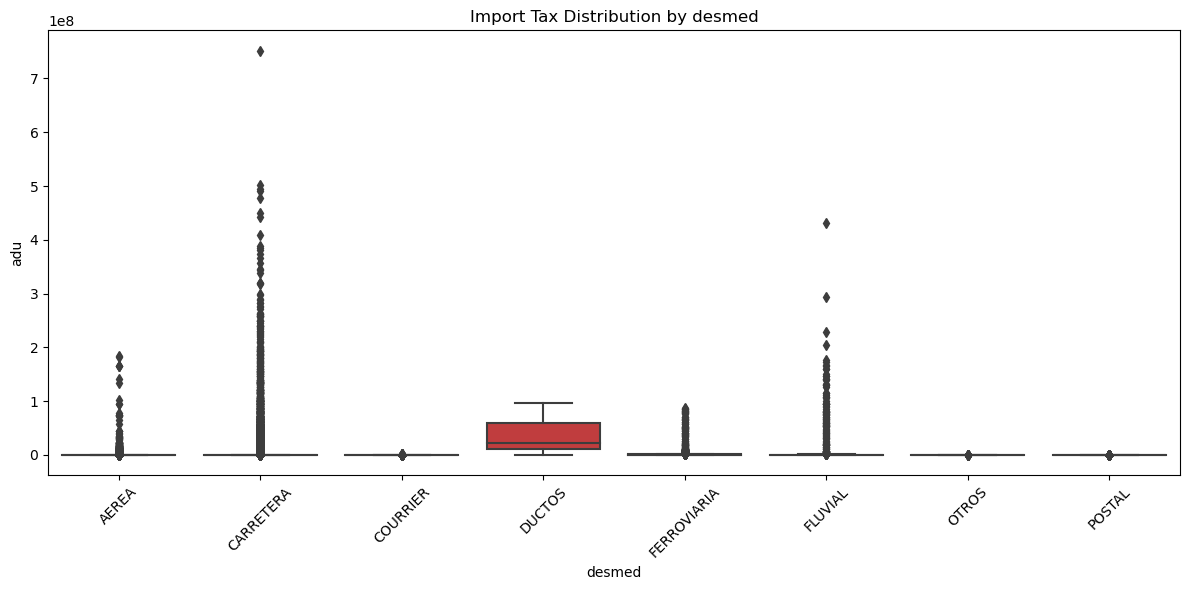

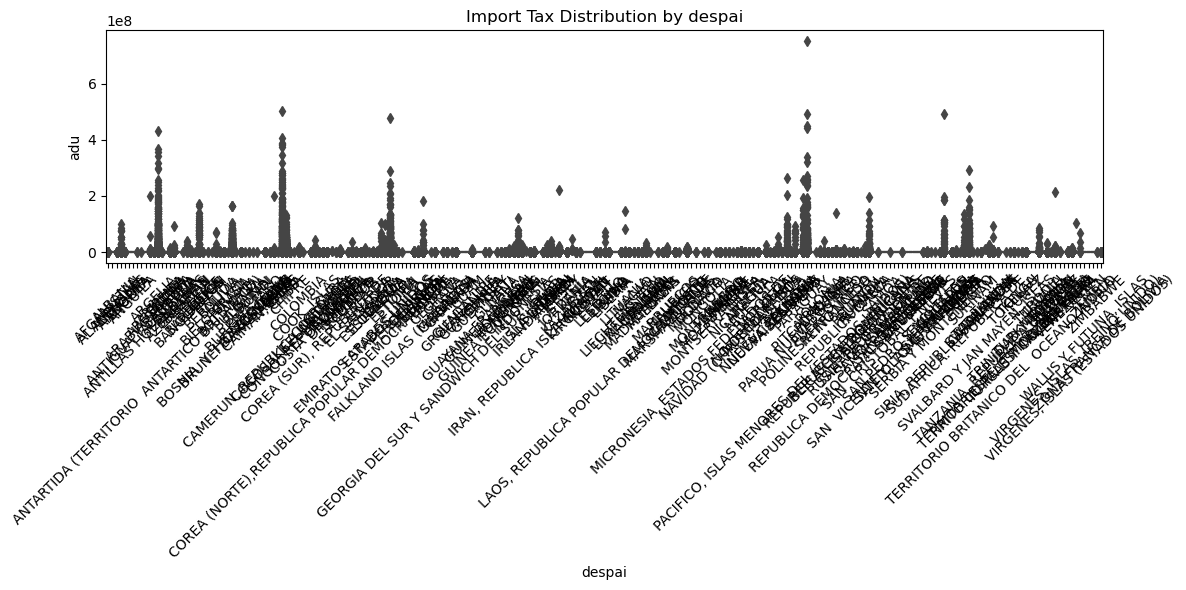

In [48]:
from scipy import stats

# 1. Basic summary statistics by category
def analyze_tax_by_category(df, category_column):
    # Group by the category and calculate import_tax statistics
    tax_summary = df.groupby(category_column)['gravamen_aduanero_bs'].agg([
        'mean', 
        'median', 
        'std', 
        'count',
        'min',
        'max'
    ]).round(2)
    
    print(f"\nImport Tax Statistics by {category_column}:")
    print(tax_summary)
    return tax_summary
# 2. Statistical test (ANOVA) to check if differences are significant
def test_significance(df, category_column):
    # Get groups of import_tax values for each category
    groups = [group['gravamen_aduanero_bs'].values for name, group in df.groupby(category_column)]
    
    # Perform ANOVA test
    f_statistic, p_value = stats.f_oneway(*groups)
    
    print(f"\nANOVA Test for {category_column}:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("p < 0.05 indicates statistically significant differences")
    
    return f_statistic, p_value
# Analyze across different categorical columns
categories_to_analyze = [
    'depto',
    'desmed',
    'despai',
    'ciiur3',
    'cucir3']
# Run analysis for each category
for category in categories_to_analyze:
    analyze_tax_by_category(df, category)
    test_significance(df, category)
def plot_tax_distribution(df, category_column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category_column, y='adu', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Import Tax Distribution by {category_column}')
    plt.tight_layout()
    plt.show()
# Create box plots for key categories
for category in categories_to_analyze[:3]:  # limiting to first 3 for brevity
    plot_tax_distribution(df, category)


In [28]:
petrol = df[df['ciiur3'] == '2320']

In [33]:
df[df['desmed']=='FERROVIARIA' ]

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
21,21,2020,10,Frontera Puerto Suárez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,7214919000,LAS DEMAS BARRAS DE HIERRO O ACERO SIN ALEAR DE SECCION TRASNVERSAL RECTANGULAR,220,612,55959.0,34762.0,33855.0,241941.0,0.00,2710,6762,2020-10-01
1214,1214,2020,6,Frontera Puerto Suárez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,4410900000,"TABLEROS DE PARTICULAS Y TABLEROS SIMILARES,INCL. AGLOMERADAS CON RESINA U OTROS AGLUTINANTES ORGANICOS,DE LAS DEMAS MATERIAS LEðOSAS",220,522,340413.0,127557.0,100594.0,887800.0,0.00,2021,6342,2020-06-01
1745,1745,2020,8,Frontera Puerto Suárez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,3901200000,POLIETILENO DE DENSIDAD SUPERIOR O IGUAL A 0.94,220,552,761434.0,668121.0,663547.0,4650121.0,0.00,2413,5711,2020-08-01
2066,2066,2020,1,Frontera Puerto Suárez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,7213919000,"LOS DEMAS ALAMBRONES DE HIERRO O ACERO SIN ALEAR, DE SECCION CIRCULAR CON DIAMETRO INFERIOR A 14 MM",220,532,199124.0,120577.0,117483.0,839213.0,0.00,2710,6761,2020-01-01
3645,3645,2020,1,Interior Santa Cruz,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,7208379000,"LOS DEMAS PRODUCTOS LAMINADOS PLANOS DE HIERRO O ACERO SIN ALEAR DE ESPESOR SUPERIOR O IGUAL A 4,75 MM PERO INFERIOR O IGUAL A 10MM",220,532,3050.0,6083.0,5985.0,42338.0,0.00,2710,6732,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023364,2023364,2024,12,Frontera Puerto Su rez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,4411130000,TABLEROS DE FIBRA DE DENSIDAD MEDIA (LLAMADOS«MDF») DE ESPESOR SUPERIOR A 5 MM PERO INFERIOR O IGUAL A 9 MM,210,522,123975.0,53057.0,51839.0,369272.0,18463.60,2021,6345,2024-12-01
2023365,2023365,2024,12,Frontera Puerto Su rez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,7216310000,"PERFILES EN U DE HIERRO O ACERO SIN ALEAR,SIMPLEMENTE LAMINADOS O EXTRUDIDOS EN CALIENTE,DE ALTURA SUPERIOR O IGUAL A 80 mm",220,612,4363.0,3561.0,3490.0,24784.0,1239.20,2710,6768,2024-12-01
2025268,2025268,2024,12,Frontera Puerto Su rez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,4411140000,TABLEROS DE FIBRA DE DENSIDAD MEDIA (LLAMADOS«MDF») DE ESPESOR SUPERIOR A 9 MM,210,522,10266.0,4900.0,4220.0,34107.0,1705.35,2021,6345,2024-12-01
2025269,2025269,2024,12,Frontera Puerto Su rez,7,CORUMBA - PUERTO SUAREZ,FERROVIARIA,BRASIL,7213919000,"LOS DEMAS ALAMBRONES DE HIERRO O ACERO SIN ALEAR, DE SECCION CIRCULAR CON DIAMETRO INFERIOR A 14 MM",220,532,271029.0,201044.0,195829.0,1399261.0,69963.05,2710,6761,2024-12-01


In [29]:
petrol

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
192,192,2020,12,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,SINGAPUR,2710193800,OTROS ACEITES LUBRICANTES,322,320,31740.0,49954.0,44710.0,347678.0,34767.00,2320,3342,2020-12-01
229,229,2020,11,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,2710193400,GRASAS LUBRICANTES,322,320,1098.0,9449.0,8885.0,65765.0,6577.00,2320,3342,2020-11-01
834,834,2020,12,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,JAPON,2710193400,GRASAS LUBRICANTES,322,320,378.0,6480.0,6358.0,45098.0,4510.00,2320,3342,2020-12-01
1210,1210,2020,9,Interior La Paz,2,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,JAPON,2710193400,GRASAS LUBRICANTES,322,320,1530.0,4904.0,4763.0,34132.0,3413.00,2320,3342,2020-09-01
1343,1343,2020,5,Interior La Paz,2,DESAGUADERO,CARRETERA,ESTADOS UNIDOS,2712109000,LAS DEMAS VASELINA,220,532,190.0,624.0,531.0,4344.0,434.00,2320,3351,2020-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025742,2025742,2024,12,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,PAISES BAJOS,2712109000,LAS DEMAS VASELINA,220,532,3004.0,7065.0,6582.0,49172.0,2458.60,2320,3351,2024-12-01
2025815,2025815,2024,12,Interior Santa Cruz,7,CORUMBA - PUERTO SUAREZ,CARRETERA,BRASIL,2710193690,LOS DEMAS ACEITES PARA TRANSMISIONES HIDRAULICAS,321,320,38459.0,76400.0,73547.0,531762.0,26588.10,2320,3341,2024-12-01
2026069,2026069,2024,12,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,83714.0,90009.0,86476.0,626462.0,31323.10,2320,3343,2024-12-01
2026805,2026805,2024,12,Aeropuerto Viru-Viru,7,AEREA,AEREA,FRANCIA,2710193890,"OTROS ACEITES LUBRICANTES PARA LAS DEMAS APLICACIONES, INCLUIDOS LOS LUBRICANTES INDUSTRIALES Y DE OTROS USOS",322,320,221.0,3586.0,3422.0,24953.0,1247.65,2320,3342,2024-12-01


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027426 entries, 0 to 2027457
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   gestion               int32         
 2   mes                   int32         
 3   desadu                object        
 4   depto                 int64         
 5   desvia                object        
 6   desmed                category      
 7   despai                category      
 8   nandina               object        
 9   desnan                object        
 10  gcer3                 object        
 11  cuode                 object        
 12  kilos                 float64       
 13  fro                   float64       
 14  fob                   float64       
 15  adu                   float64       
 16  gravamen_aduanero_bs  float64       
 17  ciiur3                category      
 18  cucir3                object        
 19  fecha

In [13]:
df['desmed'] = df['desmed'].astype('category')
df['despai'] = df['despai'].astype('category')
df['mes'] = df['mes'].astype('int32')
df['ciiur3'] = df['ciiur3'].astype('category')

In [39]:
df.query('desmed == "DUCTOS"') # lo mismo que df[df['desmed']== 'DUCTOS']


,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
71076,71076,2020,6,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,DUCTOS,CHINA,2309902000,LAS DEMAS PREMEZCLAS DE PREPARACIONES DEL TIPO...,220,411,15484.0,30025.0,25954.0,2.089710e+05,20897.0,1533,0819,2020-06-01
1170800,1170800,2022,12,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,DUCTOS,ARGENTINA,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,12562844.0,13727292.0,13578935.0,9.554195e+07,0.0,2320,3343,2022-12-01
1533956,1533956,2023,10,Frontera Yacuiba,6,POCITOS (ARG.) - YACUIBA,DUCTOS,ARGENTINA,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,2125000.0,3144311.0,2938608.0,2.188440e+07,0.0,2320,3343,2023-10-01


In [59]:
df[df['depto']==8].head()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,...,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha,month_year,year_agg
84,2020,12,Frontera Guayaramerín,8,AMAZONAS - COBIJA -GUAYARAMERI,CARRETERA,BRASIL,9506999000,LOS DEMAS ARTICULOS Y MATERIAL PARA CULTURA FI...,620,...,220.0,1888.0,1654.0,13138.0,0.0,3693,8947,2020-12-01,2020-12,2020
377,2020,11,Frontera Guayaramerín,8,AMAZONAS - COBIJA -GUAYARAMERI,CARRETERA,BRASIL,8484900000,LOS DEMAS SURTIDOS DE JUNTAS DE DISTINTA COMPO...,420,...,45.0,781.0,749.0,5437.0,29.0,2919,7492,2020-11-01,2020-11,2020
507,2020,7,Frontera Guayaramerín,8,AMAZONAS - COBIJA -GUAYARAMERI,CARRETERA,BRASIL,3923509000,"LOS DEMAS TAPONES, TAPAS, CAPSULAS Y DEMAS D...",220,...,695.0,435.0,351.0,3027.0,0.0,2520,8931,2020-07-01,2020-07,2020
1015,2020,7,Frontera Guayaramerín,8,AMAZONAS - COBIJA -GUAYARAMERI,CARRETERA,BRASIL,2005999000,LAS DEMAS HORTALIZAS O MEZCLAS DE HORTALIZAS,122,...,8714.0,14017.0,13343.0,97559.0,0.0,1513,0567,2020-07-01,2020-07,2020
1096,2020,9,Frontera Guayaramerín,8,AMAZONAS - COBIJA -GUAYARAMERI,CARRETERA,BRASIL,1108140000,FECULA DE YUCA (MANDIOCA),220,...,36275.0,13289.0,12427.0,92489.0,0.0,1532,5921,2020-09-01,2020-09,2020


In [ ]:
pd.set_option('display.max_colwidth', None)

In [7]:
# Total FOB per country-import_field combo
country_field_df = df.groupby(['despai', 'ciiur3'])['fob'].sum().reset_index()

# Optional: normalize per country to get share
country_total = country_field_df.groupby('despai')['fob'].sum().reset_index(name='total_fob')
merged_df = country_field_df.merge(country_total, on='despai')
merged_df['fob_share'] = merged_df['fob'] / merged_df['total_fob']

In [8]:
specialized = merged_df[merged_df['fob_share'] > 0.5]

In [9]:
top_fields = merged_df.sort_values(['despai', 'fob_share'], ascending=[True, False])
top_fields = top_fields.groupby('despai').head(3)

In [10]:
top_fields[top_fields['fob_share']>0.5].sort_values(by= 'total_fob', ascending=False).reset_index(drop=True).head(15)

,despai,ciiur3,fob,total_fob,fob_share
0,CHILE,2320,2.463703e+09,3.216677e+09,0.765916
1,SUIZA,2320,5.319922e+08,6.271700e+08,0.848242
2,BELGICA,2320,4.324309e+08,5.617658e+08,0.769771
3,PAISES BAJOS,2320,3.164030e+08,4.227711e+08,0.748402
4,SINGAPUR,2320,3.699924e+08,4.008401e+08,0.923042
5,TAILANDIA,3410,1.705323e+08,3.291223e+08,0.518143
6,INDONESIA,3410,1.492093e+08,2.523396e+08,0.591304
7,HUNGRIA,3410,8.149510e+07,1.058016e+08,0.770263
8,PANAMA,2320,7.617335e+07,9.717285e+07,0.783895
9,ARABIA SAUDITA,2320,3.404781e+07,5.622079e+07,0.605609


In [11]:
# Total FOB per country-import_field combo
country_w_field_df = df.groupby(['despai', 'ciiur3'])['kilos'].sum().reset_index()

country_total_w = country_w_field_df.groupby('despai')['kilos'].sum().reset_index(name='total_weight')
merged_w_df = country_w_field_df.merge(country_total_w, on='despai')
merged_w_df['weight_share'] = merged_w_df['kilos']/merged_w_df['total_weight']


In [12]:
merged_w_df[merged_w_df['weight_share']>0.5].sort_values(by='total_weight', ascending=False).reset_index(drop=True).head(15)

,despai,ciiur3,kilos,total_weight,weight_share
0,CHILE,2320,2.542124e+09,3.075709e+09,0.826516
1,ESTADOS UNIDOS,2320,1.261424e+09,1.761270e+09,0.716201
2,PARAGUAY,2320,2.679830e+08,4.967351e+08,0.539489
3,SUIZA,2320,4.667001e+08,4.720218e+08,0.988726
4,BELGICA,2320,3.784864e+08,4.164717e+08,0.908793
5,SINGAPUR,2320,3.577989e+08,3.662738e+08,0.976862
6,PAISES BAJOS,2320,2.980119e+08,3.300216e+08,0.903007
7,TURQUIA,2710,1.178782e+08,2.072163e+08,0.568866
8,URUGUAY,1553,1.038918e+08,1.892850e+08,0.548864
9,PANAMA,2320,1.285396e+08,1.354063e+08,0.949289


In [32]:
chile_plastics.tail(15)

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
1982176,2024,11,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,CHILE,2710193690,LOS DEMAS ACEITES PARA TRANSMISIONES HIDRAULICAS,321,320,4125.0,8999.0,8680.0,6.263200e+04,NaN,2320,3341,2024-11-01
1988490,2024,11,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,CHILE,2710193890,OTROS ACEITES LUBRICANTES PARA LAS DEMAS APLIC...,322,320,6788.0,20517.0,19791.0,1.427980e+05,NaN,2320,3342,2024-11-01
1991682,2024,12,Frontera Avaroa,5,ANTOFAGASTA - OLLAGUE - UYUNI,CARRETERA,CHILE,2710121330,"GASOLINAS SIN TETRAETILO DE PLOMO, PARA MOTORE...",321,313,852043.0,796030.0,743838.0,5.540373e+06,NaN,2320,3341,2024-12-01
1994126,2024,11,Frontera Pisiga,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHILE,2710121330,"GASOLINAS SIN TETRAETILO DE PLOMO, PARA MOTORE...",321,313,114579.0,123765.0,115669.0,8.614067e+05,NaN,2320,3341,2024-11-01
1998169,2024,12,Interior Potos¡,5,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHILE,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,166320.0,146975.0,141372.0,1.022949e+06,NaN,2320,3343,2024-12-01
1998170,2024,12,Interior Potos¡,5,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHILE,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,55945.0,50254.0,47972.0,3.497670e+05,NaN,2320,3343,2024-12-01
2000905,2024,11,Interior Potos¡,5,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHILE,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,83160.0,71435.0,68636.0,4.971910e+05,NaN,2320,3343,2024-11-01
2000908,2024,11,Interior Potos¡,5,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHILE,2710192100,GASOILS (GASOLEO) (DIESEL),322,313,114210.0,101209.0,97215.0,7.044150e+05,NaN,2320,3343,2024-11-01
2000930,2024,11,Frontera Avaroa,5,ANTOFAGASTA - OLLAGUE - UYUNI,CARRETERA,CHILE,2710121330,"GASOLINAS SIN TETRAETILO DE PLOMO, PARA MOTORE...",321,313,150661.0,160999.0,150350.0,1.120553e+06,NaN,2320,3341,2024-11-01
2001756,2024,11,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,CHILE,2710193810,OTROS ACEITES LUBRICANTES AUTOMOTRICES PARA MO...,322,320,2691.0,9148.0,8825.0,6.367400e+04,NaN,2320,3342,2024-11-01


<class 'pandas.core.frame.DataFrame'>
Index: 2027426 entries, 0 to 2027457
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   gestion               int32         
 1   mes                   int8          
 2   desadu                object        
 3   depto                 category      
 4   desvia                category      
 5   desmed                category      
 6   despai                category      
 7   nandina               object        
 8   desnan                object        
 9   gcer3                 object        
 10  cuode                 object        
 11  kilos                 float64       
 12  fro                   float64       
 13  fob                   float64       
 14  adu                   float64       
 15  gravamen_aduanero_bs  float64       
 16  ciiur3                category      
 17  cucir3                category      
 18  fecha                 datetime64[ns]
dtypes: ca

In [23]:
chile_plastics = df[(df['despai']== 'CHILE') & (df['ciiur3']=='2320')]

In [26]:
# Group by 'nandina' and sum FOB and weight values
plastic_types = chile_plastics.groupby('nandina').agg(
    total_p_fob=('fob', 'sum'),
    total_p_weight=('kilos', 'sum')
).reset_index()

# Sort by FOB to highlight top categories
plastic_types = plastic_types.sort_values('total_p_fob', ascending=False)
plastic_types.head()

,nandina,total_p_fob,total_p_weight
4,2710192100,1.923458e+09,1.874524e+09
5,2710192100.0,3.007346e+08,4.413358e+08
0,2710121310,1.822250e+08,1.629576e+08
1,2710121310.0,3.282541e+07,4.107394e+07
2,2710121330,1.279383e+07,1.443806e+07


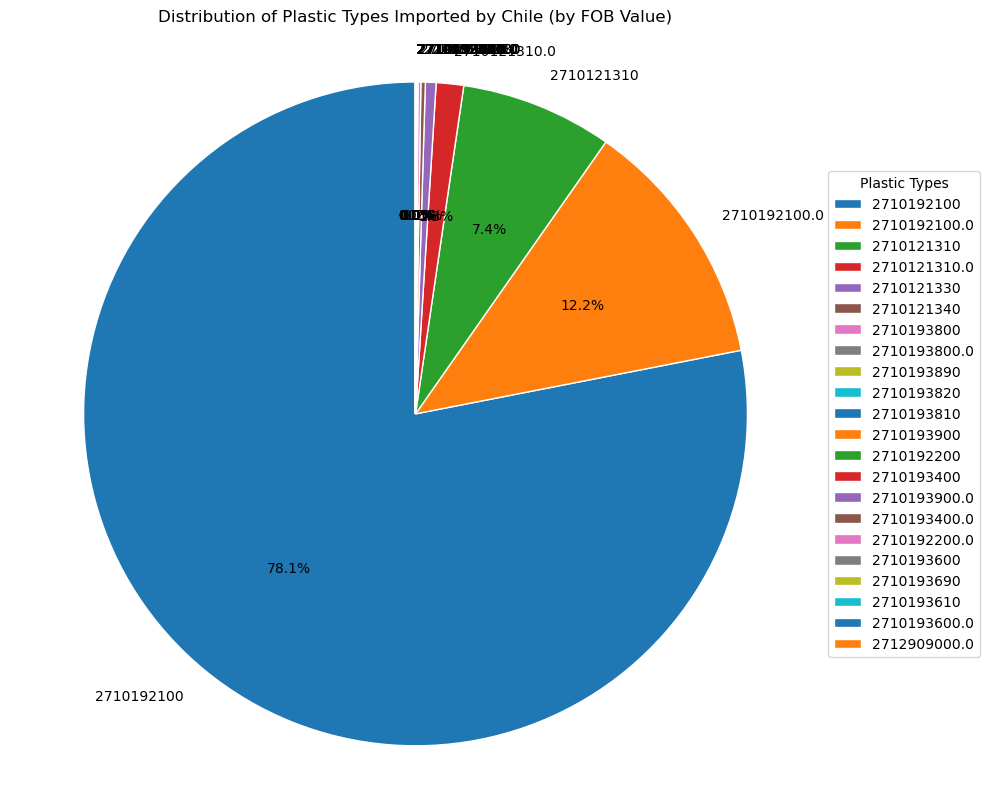

In [35]:

# colors = plt.cm.Pastel1.colors  
explode = [0.05] * len(plastic_types)  # Slightly "explode" all slices

# Plot
plt.figure(figsize=(10, 8))
plt.pie(
    plastic_types['total_p_fob'],
    labels=plastic_types['nandina'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate for better readability
  #  colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white'},  # Add white borders to slices
    textprops={'fontsize': 10}
)

plt.title('Distribution of Plastic Types Imported by Chile (by FOB Value)', pad=20)
plt.axis('equal')  # Ensures pie is drawn as a circle

# Add legend (optional)
plt.legend(
    plastic_types['nandina'],
    title="Plastic Types",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

In [31]:
chile_plastics.nandina.value_counts()

nandina
2710192100      149
2710192100.0     37
2710193800       32
2710121330       27
2710192200       19
2710121310       18
2710121340       15
2710193900       14
2710193400       14
2710193800.0     12
2710192200.0     12
2710193600       10
2710193900.0      9
2710193890        9
2710193810        7
2710121310.0      6
2710193820        6
2710193400.0      4
2710193600.0      2
2710193690        2
2712909000.0      1
2710193610        1
Name: count, dtype: int64

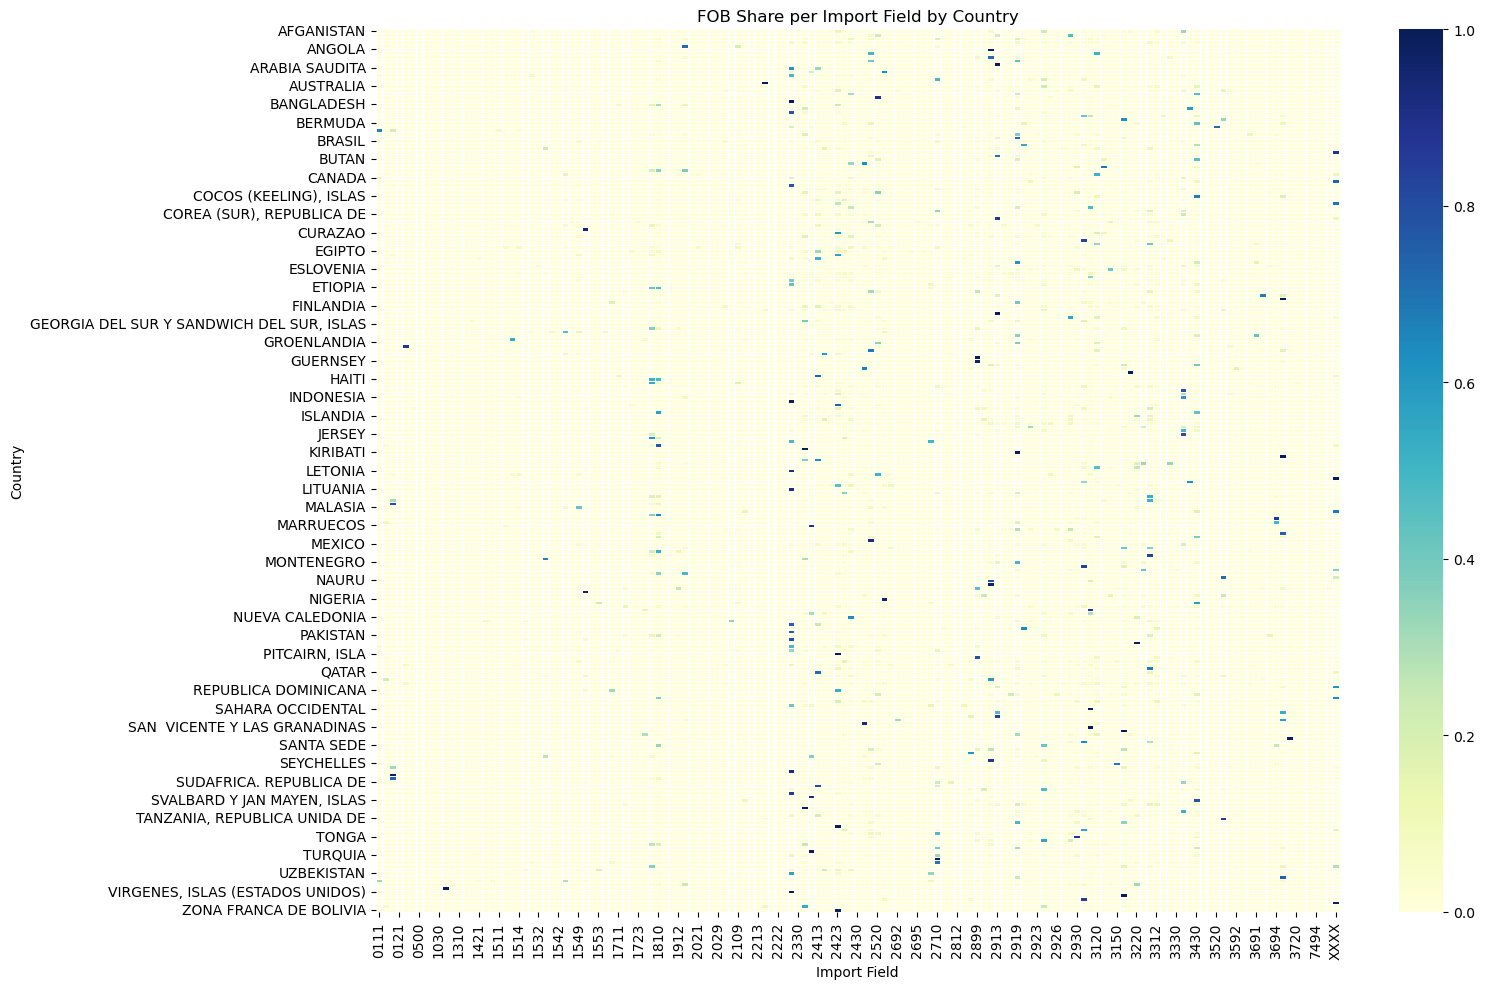

In [43]:

# Group by country and import_field and calculate total FOB
grouped = df.groupby(['despai', 'ciiur3'])['fob'].sum().reset_index()

# Calculate total FOB per country
total_per_country = grouped.groupby('despai')['fob'].sum().reset_index(name='total_fob')

# Merge to get share
merged = grouped.merge(total_per_country, on='despai')
merged['fob_share'] = merged['fob'] / merged['total_fob']

# Pivot for heatmap
heatmap_data = merged.pivot(index='despai', columns='ciiur3', values='fob_share').fillna(0)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("FOB Share per Import Field by Country")
plt.xlabel("Import Field")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
31,2020,4,Frontera Villazón,5,LA QUIACA - VILLAZON,CARRETERA,ARGENTINA,808100000,"MANZANAS,FRESCAS",112,111,415724.0,194004.0,166929.0,1350269.0,0.0,0113,0574,2020-04-01
1022,2020,9,Fluvial Puerto Jennefer,7,CORUMBA - PUERTO SUAREZ,FLUVIAL,ARGENTINA,7209270000,PRODUCTOS LAMINADOS PLANOS DE HIERRO O ACERO S...,220,532,378864.0,240595.0,226826.0,1674539.0,0.0,2710,6734,2020-09-01
1317,2020,11,Aeropuerto El Alto,2,AEREA,AEREA,ARGENTINA,3004902400,LOS DEMAS MEDICAMENTOS PARA USO HUMANO PARA T...,630,140,1047.0,120513.0,117428.0,838773.0,0.0,2423,5429,2020-11-01
1740,2020,5,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,2102109000,LAS DEMAS LEVADURAS VIVAS,121,512,38375.0,156054.0,150317.0,1086135.0,0.0,1549,0986,2020-05-01
1768,2020,3,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,9619002010,COMPRESAS Y TAMPONES HIGIENICOS DE PASTA DE PA...,630,190,67090.0,228698.0,204342.0,1591735.0,0.0,2109,6429,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026068,2024,12,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,2102109000,LAS DEMAS LEVADURAS VIVAS,121,512,29551.0,132734.0,128615.0,923831.0,NaN,1549,0986,2024-12-01
2026071,2024,12,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3004392000,LOS DEMAS MEDICAMENTOS QUE CONTENGAN HORMONAS ...,630,140,1484.0,138230.0,135201.0,962072.0,NaN,2423,5422,2024-12-01
2026072,2024,12,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3004902900,LOS DEMAS MEDICAMENTOS PARA USO HUMANO,630,140,5075.0,125260.0,121098.0,871814.0,NaN,2423,5429,2024-12-01
2026073,2024,12,Interior Santa Cruz,7,POCITOS (ARG.) - YACUIBA,CARRETERA,ARGENTINA,3004903000,LOS DEMAS MEDICAMENTOS PARA USO VETERINARIO,630,140,5754.0,117158.0,115387.0,815415.0,NaN,2423,5429,2024-12-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027426 entries, 0 to 2027457
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   gestion               int32         
 1   mes                   int8          
 2   desadu                object        
 3   depto                 category      
 4   desvia                category      
 5   desmed                category      
 6   despai                category      
 7   nandina               object        
 8   desnan                object        
 9   gcer3                 object        
 10  cuode                 object        
 11  kilos                 float64       
 12  fro                   float64       
 13  fob                   float64       
 14  adu                   float64       
 15  gravamen_aduanero_bs  float64       
 16  ciiur3                category      
 17  cucir3                category      
 18  fecha                 datetime64[ns]
dtypes: ca

In [12]:
df.desadu.unique()

array(['Aeropuerto Viru-Viru', 'Interior La Paz', 'Interior Cochabamba',
       'Interior Oruro', 'Interior Santa Cruz',
       'Especializada Interior La Paz', 'Frontera Yacuiba',
       'Aeropuerto El Alto', 'Frontera Puerto Suárez',
       'Aeropuerto Cochabamba', 'Frontera Villazón',
       'Especializada Interior Santa C', 'Frontera Avaroa',
       'Frontera Guayaramerín', 'Frontera Tambo Quemado',
       'Postal Santa Cruz', 'Interior Sucre',
       'Especializada Interior Tarija', 'Especializada Interior Oruro',
       'Especializada Interior Cochaba', 'Especializada Interior Potosi',
       'Frontera Bermejo', 'Postal Cochabamba', 'Frontera Pisiga',
       'Frontera Charaña', 'Frontera Cobija', 'Frontera Desaguadero',
       'Postal La Paz', 'Frontera Arroyo Concepción',
       'Zona Franca Industrial Oruro', 'Fluvial Puerto Jennefer',
       'Interior Tarija', 'Especializada Interior Sucre',
       'Zona Franca Industrial Patacam', 'Zona Franca Industrial El Alto',
       'Int

In [13]:
df.desvia.unique()

['AEREA', 'DESAGUADERO', 'IQUIQUE - PISIGA - BELLA VISTA', 'ARICA - CHARANA - TAMBO QUEMAD', 'CORUMBA - PUERTO SUAREZ', ..., 'AMAZONAS - COBIJA -GUAYARAMERI', 'POSTAL - CORREO', 'DESCONOCIDA', 'ORAN - BERMEJO', 'ZONAS FRANCAS']
Length: 13
Categories (13, object): ['AEREA', 'AMAZONAS - COBIJA -GUAYARAMERI', 'ANTOFAGASTA - OLLAGUE - UYUNI', 'ARICA - CHARANA - TAMBO QUEMAD', ..., 'ORAN - BERMEJO', 'POCITOS (ARG.) - YACUIBA', 'POSTAL - CORREO', 'ZONAS FRANCAS']

In [14]:
df['desvia'].unique().tolist()

['AEREA',
 'DESAGUADERO',
 'IQUIQUE - PISIGA - BELLA VISTA',
 'ARICA - CHARANA - TAMBO QUEMAD',
 'CORUMBA - PUERTO SUAREZ',
 'POCITOS (ARG.) - YACUIBA',
 'LA QUIACA - VILLAZON',
 'ANTOFAGASTA - OLLAGUE - UYUNI',
 'AMAZONAS - COBIJA -GUAYARAMERI',
 'POSTAL - CORREO',
 'DESCONOCIDA',
 'ORAN - BERMEJO',
 'ZONAS FRANCAS']

In [8]:
via_aerea = df[df['desvia']=='AEREA']

In [9]:
via_aerea.head()

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2.0,308.0,297.0,2145.0,107.0,2926,7243,2020-07-01
11,2020,3,Aeropuerto Viru-Viru,7,AEREA,AEREA,CHINA,9401800000,LOS DEMAS ASIENTOS,610,230,50.0,174.0,168.0,1210.0,484.0,3610,8211,2020-03-01
12,2020,8,Aeropuerto Viru-Viru,7,AEREA,COURRIER,JAPON,8443990090,LAS DEMAS PARTES Y ACCESORIOS,410,840,1.0,318.0,300.0,2212.0,111.0,2929,7266,2020-08-01
14,2020,10,Aeropuerto Viru-Viru,7,AEREA,AEREA,ITALIA,8421299000,LOS DEMAS APARATOS PARA FILTRAR O DEPURAR LIQU...,410,840,10.0,924.0,843.0,6434.0,0.0,2919,7436,2020-10-01
17,2020,12,Aeropuerto El Alto,2,AEREA,COURRIER,CHINA,8479810000,LAS DEMAS MAQUINAS Y APARATOS PARA TRABAJAR ME...,410,840,15.0,482.0,348.0,3358.0,0.0,2929,7284,2020-12-01


In [10]:
via_aerea['desadu'].unique().tolist()

['Aeropuerto Viru-Viru',
 'Aeropuerto El Alto',
 'Aeropuerto Cochabamba',
 'Interior La Paz',
 'Interior Santa Cruz',
 'Interior Cochabamba',
 'No Especificado',
 'Frontera Yacuiba',
 'Zona Franca Industrial El Alto',
 'Interior Oruro',
 'Interior Potos¡',
 'Interior Sucre',
 'Interior Tarija',
 'Fluvial Puerto Jennefer']

In [12]:
via_aerea.desadu.value_counts()

desadu
Aeropuerto Viru-Viru              441143
Aeropuerto El Alto                268923
Aeropuerto Cochabamba              61474
Interior Sucre                       813
Interior Santa Cruz                  322
No Especificado                      238
Zona Franca Industrial El Alto        60
Interior Cochabamba                   58
Interior La Paz                       52
Interior Potos¡                       48
Fluvial Puerto Jennefer               39
Frontera Yacuiba                      16
Interior Tarija                        9
Interior Oruro                         2
Name: count, dtype: int64

In [13]:
correo = df[df['desvia']=='POSTAL - CORREO']
correo.head(10)

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha
96,2020,8,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,ESTADOS UNIDOS,8507600000,"ACUMULADORES ELECTRICOS, INCLUIDOS SUS SEPARAD...",530,830,1.0,42.0,39.0,295.0,0.0,3140,7781,2020-08-01
199,2020,8,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,"COREA (NORTE),REPUBLICA POPULAR DEMOCRATICA DE",3926909000,LAS DEMAS MANUFACTURAS DE PLASTICO Y DE LAS DE...,620,220,1.0,27.0,25.0,186.0,19.0,2520,8939,2020-08-01
337,2020,1,Postal Cochabamba,3,POSTAL - CORREO,POSTAL,AUSTRALIA,9803000000,ENCOMIENDAS POSTALES,700,010,1.0,53.0,50.0,372.0,37.0,3699,8999,2020-01-01
391,2020,2,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,ESTADOS UNIDOS,6103490000,"PANTALONES LARGOS,PANTALONES CON PETO,PANTALON...",620,150,1.0,43.0,38.0,302.0,121.0,1810,8432,2020-02-01
622,2020,2,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,VANUATU,9004100000,GAFAS (ANTEOJOS) DE SOL,620,220,1.0,8.0,7.0,59.0,6.0,3320,8842,2020-02-01
850,2020,1,Postal La Paz,2,POSTAL - CORREO,POSTAL,"RUSIA, FEDERACION DE",9803000000,ENCOMIENDAS POSTALES,700,010,2.0,22.0,15.0,150.0,15.0,3699,8999,2020-01-01
1002,2020,7,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,SINGAPUR,9018901000,LOS DEMAS INSTRUMENTOS Y APARATOS ELECTROMEDICOS,410,810,6.0,222.0,207.0,1548.0,0.0,3311,8722,2020-07-01
1121,2020,1,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,CHINA,8518300000,"AURICULARES,INCLUSO COMBINADOS CON MICROFONO",410,850,2.0,101.0,93.0,704.0,70.0,3230,7642,2020-01-01
1417,2020,3,Postal La Paz,2,POSTAL - CORREO,POSTAL,JAPON,9803000000,ENCOMIENDAS POSTALES,700,010,46.0,2613.0,2206.0,18183.0,1819.0,3699,8999,2020-03-01
1596,2020,9,Postal Santa Cruz,7,POSTAL - CORREO,POSTAL,SINGAPUR,7007190000,LOS DEMAS VIDRIOS DE SEGURIDAD CONSTITUIDO POR...,220,533,1.0,8.0,7.0,54.0,8.0,2610,6647,2020-09-01


In [15]:
correo.desadu.value_counts()

desadu
Postal Santa Cruz    9307
Postal Cochabamba    3286
Postal La Paz         938
Interior Sucre          6
Interior Potos¡         1
Name: count, dtype: int64

In [17]:
zona_franca = df[df['desvia']== 'ZONAS FRANCAS']
zona_franca.desadu.value_counts()

desadu
Zona Franca Industrial Oruro      918
Zona Franca Industrial Patacam    439
Zona Franca Industrial El Alto     87
Zona Franca Industrial Winner      52
Especializada Interior Cochaba      5
Interior La Paz                     3
Interior Santa Cruz                 1
Interior Cochabamba                 1
Name: count, dtype: int64

In [20]:
customs_data = {
    "AEREA": {},
    "DESAGUADERO": {'latitude': -16.566667, 'longitude': -69.0},
    "IQUIQUE - PISIGA - BELLA VISTA": {'latitude': -19.266667, 'longitude': -68.616667},
    "ARICA - CHARANA - TAMBO QUEMAD": {'latitude': -17.591944, 'longitude': -69.445556},
    "CORUMBA - PUERTO SUAREZ": {'latitude': -18.9661645, 'longitude': -57.8032514},
    "POCITOS (ARG.) - YACUIBA": {'latitude': -22.009722, 'longitude': -63.677222},
    "LA QUIACA - VILLAZON": {'latitude': -22.09650, 'longitude': -65.59629},
    "ANTOFAGASTA - OLLAGUE - UYUNI": {'latitude': -21.283333, 'longitude': -68.183333},
    "AMAZONAS - COBIJA -GUAYARAMERI": {'latitude': -11.01, 'longitude': -68.766667},
    "POSTAL - CORREO": {},
    "DESCONOCIDA": {},
    "ORAN - BERMEJO": {'latitude': -22.732222, 'longitude': -64.3425},
    "ZONAS FRANCAS": {}
}

airport_data = {
    "Aeropuerto Viru-Viru": {'latitude': -17.6447, 'longitude': -63.1353},
    "Aeropuerto El Alto": {'latitude': -16.5110911, 'longitude': -68.1878565},
    "Aeropuerto Cochabamba": {'latitude': -17.42081, 'longitude': -66.17746}
}

In [21]:
df['Lattitude'] = df['desvia'].apply(lambda x: customs_data.get(x, {}).get('latitude', ''))
df['Longitude'] = df['desvia'].apply(lambda x: customs_data.get(x, {}).get('longitude', ''))

In [29]:
df.head(20)

,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,gcer3,cuode,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha,Lattitude,Longitude
0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8452300000,AGUJAS PARA MAQUINAS DE COSER,220,830,2.0,308.0,297.0,2145.0,107.0,2926,7243,2020-07-01,-17.6447,-63.1353
1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8421999000,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,420,840,199.0,5963.0,5803.0,41503.0,4151.0,2919,7439,2020-09-01,-16.566667,-69.0
2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6506100000,CASCOS DE SEGURIDAD,620,150,716.0,4526.0,4260.0,31500.0,0.0,2520,8484,2020-11-01,-16.566667,-69.0
3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8515900000,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,420,840,501.0,346.0,300.0,2408.0,120.0,2922,7373,2020-01-01,-19.266667,-68.616667
4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3304910000,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",630,140,1166.0,1961.0,1675.0,13647.0,1366.0,2424,5532,2020-02-01,-17.591944,-69.445556
5,2020,5,Interior Santa Cruz,7,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,TAILANDIA,4016999000,LAS DEMAS MANUFACTURAS DE CAUCHO VULCANIZADO S...,630,220,9.0,629.0,582.0,4376.0,437.0,2519,6299,2020-05-01,-17.591944,-69.445556
6,2020,5,Interior Santa Cruz,7,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,TURQUIA,8421310000,APARATOS PARA FILTRAR O DEPURAR GASES: FILTROS...,410,840,1.0,27.0,25.0,185.0,9.0,2919,7436,2020-05-01,-19.266667,-68.616667
7,2020,10,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,MEXICO,8471410000,LAS DEMAS MAQUINAS AUTOMATICAS PARA TRATAMIENT...,410,810,818.0,6423.0,5882.0,44702.0,4470.0,3000,7522,2020-10-01,-17.591944,-69.445556
8,2020,1,Interior Cochabamba,3,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,8409993000,"LAS DEMAS PARTES,IDENTIFICABLES COMO DESTINADA...",530,910,5.0,23.0,19.0,160.0,8.0,3430,7139,2020-01-01,-17.591944,-69.445556
9,2020,7,Interior Santa Cruz,7,CORUMBA - PUERTO SUAREZ,CARRETERA,BRASIL,8419110000,CALENTADORES DE AGUA DE CALENTAMIENTO INSTANTA...,410,840,43.0,481.0,300.0,3348.0,0.0,2930,7418,2020-07-01,-18.966165,-57.803251


In [25]:
df['Lattitude'] = df['desadu'].apply(lambda x: airport_data.get(x, {}).get('latitude', ''))
df['Longitude'] = df['desadu'].apply(lambda x: airport_data.get(x, {}).get('longitude', ''))

In [27]:
# First: try to get latitude and longitude from customs_data using 'desvia'
df['Lattitude'] = df['desvia'].apply(lambda x: customs_data.get(x, {}).get('latitude', ''))
df['Longitude'] = df['desvia'].apply(lambda x: customs_data.get(x, {}).get('longitude', ''))

# Then: if any are still empty, fill them with values from airport_data using 'desadu'
df['Lattitude'] = df.apply(
    lambda row: airport_data.get(row['desadu'], {}).get('latitude', '') if row['Lattitude'] == '' else row['Lattitude'],
    axis=1
)
df['Longitude'] = df.apply(
    lambda row: airport_data.get(row['desadu'], {}).get('longitude', '') if row['Longitude'] == '' else row['Longitude'],
    axis=1
)

In [30]:
df.to_csv("c:/Users/sebas/Desktop/practice/maps.csv")

In [3]:
maps = pd.read_csv('maps.csv')

In [3]:
maps.head(5)

,Unnamed: 0,gestion,mes,desadu,depto,desvia,desmed,despai,nandina,desnan,...,kilos,fro,fob,adu,gravamen_aduanero_bs,ciiur3,cucir3,fecha,Lattitude,Longitude
0,0,2020,7,Aeropuerto Viru-Viru,7,AEREA,AEREA,JAPON,8.452300e+09,AGUJAS PARA MAQUINAS DE COSER,...,2.0,308.0,297.0,2145.0,107.0,2926,7243,2020-07-01,-17.644700,-63.135300
1,1,2020,9,Interior La Paz,2,DESAGUADERO,CARRETERA,PERU,8.421999e+09,LAS DEMAS PARTES DE APARATOS PARA FILTRAR O DE...,...,199.0,5963.0,5803.0,41503.0,4151.0,2919,7439,2020-09-01,-16.566667,-69.000000
2,2,2020,11,Interior Cochabamba,3,DESAGUADERO,CARRETERA,PERU,6.506100e+09,CASCOS DE SEGURIDAD,...,716.0,4526.0,4260.0,31500.0,0.0,2520,8484,2020-11-01,-16.566667,-69.000000
3,3,2020,1,Interior Oruro,4,IQUIQUE - PISIGA - BELLA VISTA,CARRETERA,CHINA,8.515900e+09,PARTES DE MAQUINAS Y APARATOS PARA SOLDAR(AUNQ...,...,501.0,346.0,300.0,2408.0,120.0,2922,7373,2020-01-01,-19.266667,-68.616667
4,4,2020,2,Interior La Paz,2,ARICA - CHARANA - TAMBO QUEMAD,CARRETERA,CHINA,3.304910e+09,"LAS DEMAS PREPARACIONES DE BELLEZA: POLVOS,INC...",...,1166.0,1961.0,1675.0,13647.0,1366.0,2424,5532,2020-02-01,-17.591944,-69.445556


C:\Users\sebas\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


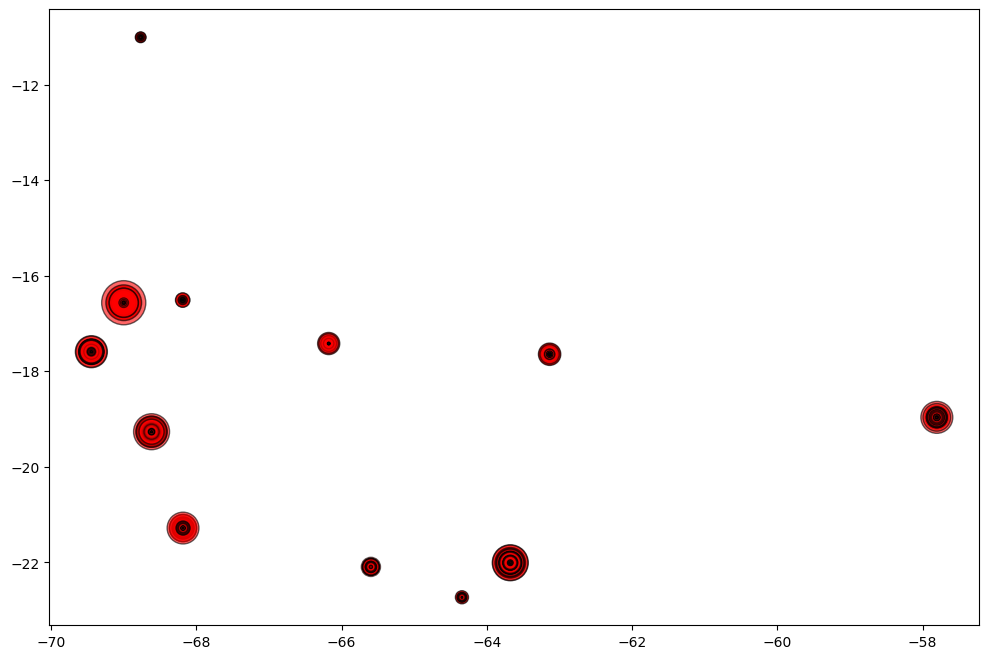

In [4]:
# Create the figure
plt.figure(figsize=(12, 8))
# Plot bubbles (size scaled by FOB value)
plt.scatter(
    maps["Longitude"],
    maps["Lattitude"],
    s=maps["fob"] / 100000,  # Adjust scale for visibility
    c="red",              # Color
    alpha=0.6,            # Transparency
    edgecolors="black",   # Border
    label="FOB Value (USD)"
)
plt.show()

In [6]:
pip install geopandas 

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/0b/70/d5cd0696eff08e62fdbdebe5b46527facb4e7220eabe0ac6225efab50168/geopandas-1.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/3d/ad/afc1cdea5dac6afb95d561c9ec73c27722d494d8faab7e0452cf71fba71f/pyogrio-0.11.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.5.0 from https://files.pythonhosted.org/packages/92/39/ef6f06a5b223dbea308cfcbb7a0f72e7b506aef1850e061b2c73b0818715/pyproj-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/93/5b/842022c00fbb051083c1c85430f3bb55565b7fd2d775f4f398c0ba8052ce/shapely-2.1.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/338.4 kB ? eta -:--:--
   -------- ------------------------------- 71.7/338.4 kB 2.0 MB/s eta 0:00:01
   

In [7]:
import geopandas as gpd

C:\Users\sebas\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


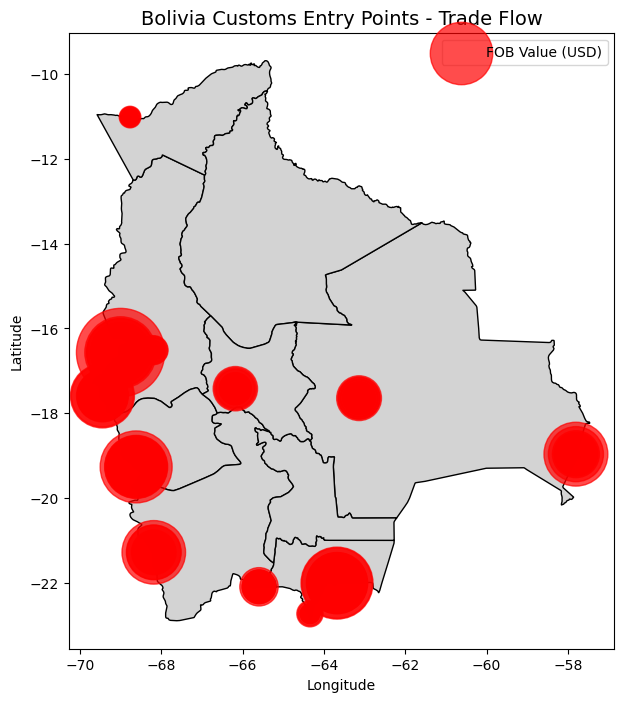

In [27]:
bolivia_map = gpd.read_file(r"C:\Users\sebas\Desktop\practice\bo_shp\bo.shp")
# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
bolivia_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Overlay bubbles
ax.scatter(
    maps["Longitude"],
    maps["Lattitude"],
    s=maps["fob"] / 25000,
    c="red",
    alpha=0.7,
    label="FOB Value (USD)"
)
# Customize
plt.title("Bolivia Customs Entry Points - Trade Flow", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [12]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [15]:
import folium

# Create a base map centered on Bolivia
m = folium.Map(location=[-16.5, -64.5], zoom_start=6)

# Add bubbles
for _, row in maps.iterrows():
    folium.CircleMarker(
        location=[row["Lattitude"], row["Longitude"]],
        radius=row["fob"] / 100000,  # Adjust size
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['desvia']}<br>fob: ${row['fob']:,}"
    ).add_to(m)

# Save or display
m.save("bolivia_trade_map.html")
m  # Display in Jupyter Notebook

ValueError: Location values cannot contain NaNs.

In [17]:
print(maps[["Lattitude", "Longitude"]].isna().sum())

Lattitude    16866
Longitude    16866
dtype: int64


In [19]:
maps_clean = maps.dropna(subset=["Lattitude", "Longitude"])

C:\Users\sebas\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


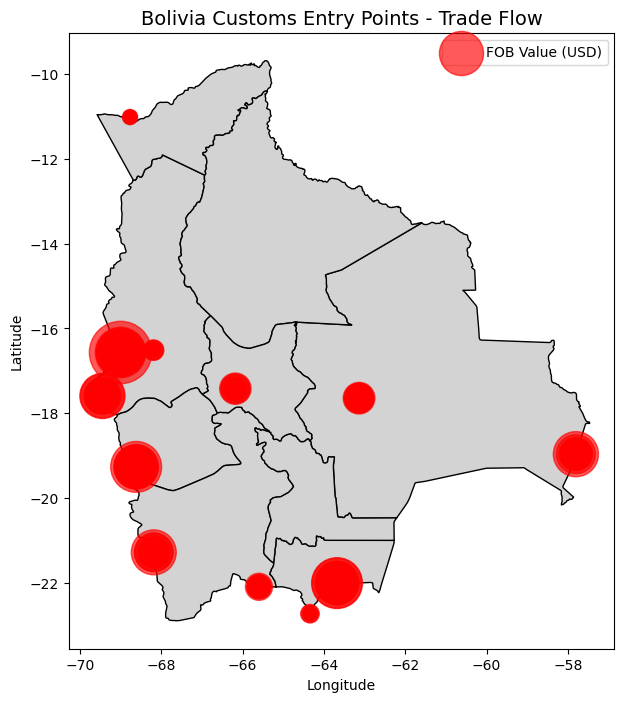

In [20]:
bolivia_map = gpd.read_file(r"C:\Users\sebas\Desktop\practice\bo_shp\bo.shp")
# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
bolivia_map.plot(ax=ax, color="lightgray", edgecolor="black")

# Overlay bubbles
ax.scatter(
    maps_clean["Longitude"],
    maps_clean["Lattitude"],
    s=maps_clean["fob"] / 50000,
    c="red",
    alpha=0.65,
    label="FOB Value (USD)"
)
# Customize
plt.title("Bolivia Customs Entry Points - Trade Flow", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [28]:
maps.Lattitude.value_counts()

Lattitude
-17.591944    495330
-17.644700    441143
-19.266667    352098
-16.511091    268923
-18.966165    200896
-22.009722     91980
-16.566667     72397
-17.420810     61474
-22.732222     10289
-22.096500      6934
-21.283333      6254
-11.010000      2842
Name: count, dtype: int64

In [29]:
maps.loc['-11.010000']

KeyError: '-11.010000'